# Abstracto

# Titulo: Exploración preliminar uni y multivariada de datos comprendiendo la distribución y relaciones entre las variables de interés, para posteriormente, realizar un método de análisis predictivo de Regresión Lineal.

# Resumen:

El estudio adjunto, presenta un análisis exploratorio de datos aplicado a un dataset ya seleccionado del rubro Inmobiliario. 

En primera instancia, se tendrá por objetivo realizar exploraciones preliminares de los datasets, incluyendo la identificación y descripción cualitativa de las variables de interés (dependientes e independientes), dimensionalidad y tipo de datos, resumenes estadísticos, identificación y tratamiento de valores faltantes y valores atípicos, etc. junto con el contexto de los datos de acuerdo al rubro al cual pertenecen, para posteriormente aplicar un modelo supervisado predictivo de regresión lineal, combinando variables cuantitativas y categóricas nominales y ordinales.

En segunda instancia, procederemos a realizar dos o más preguntas o hipótesis que se espera puedan ser resueltas a través de análisis estadísticos multivariados (dos o más variables) de manera grafica. Para ello se dispondrá de diferentes gráficos incluyendo Series de Tiempo, Correlación, Histogramas y Dispersión, los cuales nos permitirán identificar las variables dependientes e independientes, los valores atípicos o outliers, correlación entre variables de tipo numéricas y finalmente el agrupamiento o clasificación para variables de tipo categóricas.

Finalmente, estos resultados preliminares nos proporcionarán una visión general de la estructura y naturaleza de los datos, facultando la selección de un algoritmo de predicción que se adecúe de buena manera a la variabilidad de los datos, para posteriormente desarrollar el algoritmo a través de la división del dataset en porcentajes o muestras de entrenamiento ý pruebas, en los cuales el algoritmo entrenará su poder predictivo con los datos de entrenamiento, para posteriormente poder predecir un valor real en función de los datos de prueba. 

También se miden las métricas del algoritmo predicitivo, las cuales en función de que tan bien se ajuste el modelo a los datos de entrenamiento y testeo, indican en qué medida el modelo explica la variabilidad de la variable objetivo (dependiente) o su poder predictivo. 

# Objetivo

Diseñar un sistema de predicción del precio de una propiedad en función de las características más relevantes de esta para una inmobiliaria que está recién ingresando al rubro y no tiene el know how de la industria.

# Contexto Comercial

El equipo de ventas de la inmobiliaria posee información de las ventas de propiedades (Casas) en King County, Washington (USA) entre Mayo de 2014 y Mayo de 2015. Su función consiste en ofrecer el mejor precio del inmueble a los clientes en función de ciertos atributos de la propiedad (previamente definidos) demandados por los futuros dueños.

# Problema Comercial 

¿Cómo identificamos los atributos de la propiedad más relevantes para los clientes, que a su vez, permitan predecir de mejor manera el precio estimado del inmueble, permitiendo ofrecer la mejor oportunidad del mercado?

# Preguntas o Hipótesis

1. ¿Cuáles son las variables independientes que influyen más significativamente en las variaciones de la variable dependiente (objetivo)?

2. ¿Qué variables poseen valores atípicos que podrían ser fácilmente reemplazados y/o eliminados, sin embargo, requieren herramientas de tratamiento más avanzadas evitando perder información importante para el modelo? 

3. Cuales variables visiblemente no poseen un impacto significativo en las predicciones, sin embargo, si se evalúan de manera correcta podrían aumentar el poder predictivo del modelo?

# Elección Dataset

Considerando que los tres datasets tienen información representativa, pocos o nulos valores no numericos y tienen muchas variables interesantes de analizar, en esta ocasión elegiré el dataset N°3, asociado a la predicción del precio de una propiedad, dependiendo de las diferentes características de esta, debido a la claridad de la información, la facilidad para interpretar y generar relaciones entre las variables, los diferentes tipos de variables que posee, además de ser un campo del cual tengo mayor conocimiento y por lo tanto me interesa aprender más.

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Fuente: https://www.kaggle.com/datasets/arathipraj/house-data
url3 = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/House_Data.csv'
df3 = pd.read_csv(url3)
df3.shape

(21613, 21)

In [3]:
df3.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17076,5351200280,20150407T000000,845000,4,2.50,2390,5071,2.0,0,0,...,9,1760,630,1988,0,98122,47.6144,-122.283,1940,5071
1310,7298040310,20140523T000000,556000,5,2.50,3840,16905,2.0,0,0,...,11,3840,0,1991,0,98023,47.2996,-122.342,3270,12133
7697,1774230090,20140613T000000,697000,4,2.75,3650,48351,1.5,0,0,...,8,3650,0,1978,0,98077,47.7632,-122.089,2820,53143
11337,1796360990,20140701T000000,205000,3,1.75,1170,8239,1.0,0,0,...,7,1170,0,1981,0,98042,47.3679,-122.088,1180,7866
13661,1026069044,20141010T000000,785000,4,2.25,3200,53357,2.0,0,0,...,9,3200,0,1972,0,98077,47.7550,-122.035,2650,54014
9502,3734900110,20150204T000000,230000,2,0.75,890,19703,1.0,0,0,...,6,890,0,1934,0,98045,47.4922,-121.783,1270,9800
18609,7202270930,20140606T000000,600000,4,2.50,2560,5593,2.0,0,0,...,7,2560,0,2001,0,98053,47.6886,-122.037,2800,5890
19098,2114700615,20140708T000000,148000,2,1.00,630,4200,1.0,0,0,...,6,630,0,1930,0,98106,47.5329,-122.348,970,4200
10512,2558610070,20150217T000000,400000,4,2.25,1970,8941,2.0,0,0,...,7,1970,0,1973,0,98034,47.7223,-122.172,1880,7793
3043,7595700025,20140725T000000,430000,2,1.00,990,4920,1.0,0,0,...,6,990,0,1931,0,98117,47.6939,-122.368,990,4960


In [4]:
# Posicionamos la variable objetivo en la última columna.
nombre_variable_obj_3 = df3.columns[1]
nombre_variable_obj_3
variable_obj_3 = df3.pop(nombre_variable_obj_3)
df3.insert(len(df3.columns), nombre_variable_obj_3, variable_obj_3)
df3.sample(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
2961,1947300115,464000,3,1.00,1320,3625,2.0,0,0,3,...,1320,0,1900,0,98122,47.6049,-122.288,1660,5438,20140619T000000
9122,6623400356,250000,3,1.75,1200,24805,1.0,0,0,3,...,1200,0,1984,0,98031,47.4236,-122.195,2150,4339,20140702T000000
905,3188100400,530000,3,1.75,1250,6041,1.5,0,0,5,...,1250,0,1942,0,98115,47.6900,-122.304,1180,6042,20140603T000000
7918,537000325,475000,3,2.50,2420,36862,1.0,0,0,4,...,1530,890,1957,0,98003,47.3264,-122.308,1670,9046,20141104T000000
13753,6669150530,230000,3,1.50,1500,11616,1.0,0,0,3,...,1100,400,1980,0,98031,47.4062,-122.174,1830,8288,20141117T000000
13496,5634500688,1127500,6,3.25,3870,24700,2.0,0,0,3,...,2520,1350,1989,0,98028,47.7517,-122.233,2360,30030,20150325T000000
17676,1785400770,500000,4,2.25,1960,12436,2.0,0,0,3,...,1960,0,1984,0,98074,47.6276,-122.037,1960,12436,20140825T000000
2476,2620069195,340000,4,1.75,2140,11651,2.5,0,0,3,...,2140,0,1930,2001,98022,47.1960,-122.006,2030,10978,20141104T000000
13110,3758900220,1135000,4,4.25,4590,17621,2.0,0,0,3,...,3160,1430,2003,0,98033,47.6973,-122.205,3800,12268,20141226T000000
2355,1425069116,1187500,4,3.50,4340,217800,2.0,0,0,3,...,4340,0,2003,0,98053,47.6471,-122.013,3430,219106,20141107T000000


# Descripción Variables df3 - Modelo Supervisado de Regresion:

1. id: Identificar Unico por Propiedad Vendida
2. date: Fecha de Venta de la Propiedad
3. price: Precio de Venta en USD.
4. bedrooms: N° Habitaciones
5. bathrooms: N° Baños
6. sqft _ living: Metros Cuadrados Efectivos (Utilizables)
7. sqft _ lot: Metros cuadrados totales del Terreno.
8. floors: N° Pisos
9. waterfront: Si tienen vista al Mar/Bahia/Lago (SI: 1, NO: 0)
10. view: Rango de 0-4, indicando la calidad de la vista que tiene la propiedad. 
11. condition: Rango de 1-5, indicando en qué estado se encuentra la propiedad.
12. grade: Rango de 1-13, indicando nivel de construcción y diseño. (1-3: Bajo Nivel, 7: Promedio, 11-13: Alto Nivel)
13. sqft _ above: Metros cuadrados de los Pisos Superiores (>1)
14. sqft _ basement: Metros cudrádos Sótano.
15. yr _ built: Año de construcción.
16. yr _ renovated: Año de la última renovación.
17. zipcode: Codigo Postal. 
18. lat: Latitud
19. long: longitud 
20. sqft _ living15: Pies cuadrados de espacio habitable al interior de la vivienda para los 15 vecinos más cercanos a la propiedad.
21. sqft _ lot15: Pies cuadrados de terrenos de las propiedades de los 15 vecinos más cercanos a la propiedad.

# Valores Nulos, NO Numericos.

In [5]:
# No se detectan valores NAN, por lo cual no se requiere tratamiento de ellos.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [6]:
# LLevamos la fecha de venta a formato date y luego a año.
df3['date'] = pd.to_datetime(df3['date'])
df3['date'] = df3['date'].dt.year.astype('int64')

In [7]:
# Camiamos type object por category y también categorizamos variables numéricas que no tiene sentido disponerlas como número.
df3['bedrooms'] = df3['bedrooms'].astype('category')
df3['bathrooms'] = df3['bathrooms'].astype('int64')
df3['bathrooms'] = df3['bathrooms'].astype('category')
df3['floors'] = df3['floors'].astype('int64')
df3['floors'] = df3['floors'].astype('category')
df3['waterfront'] = df3['waterfront'].astype('category')
df3['view'] = df3['view'].astype('category')
df3['condition'] = df3['condition'].astype('category')
df3['grade'] = df3['grade'].astype('category')

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21613 non-null  int64   
 1   price          21613 non-null  int64   
 2   bedrooms       21613 non-null  category
 3   bathrooms      21613 non-null  category
 4   sqft_living    21613 non-null  int64   
 5   sqft_lot       21613 non-null  int64   
 6   floors         21613 non-null  category
 7   waterfront     21613 non-null  category
 8   view           21613 non-null  category
 9   condition      21613 non-null  category
 10  grade          21613 non-null  category
 11  sqft_above     21613 non-null  int64   
 12  sqft_basement  21613 non-null  int64   
 13  yr_built       21613 non-null  int64   
 14  yr_renovated   21613 non-null  int64   
 15  zipcode        21613 non-null  int64   
 16  lat            21613 non-null  float64 
 17  long           21613 non-null  

In [9]:
df3.describe().round(1)

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
count,2.161300e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,540088.1,2079.9,15107.0,1788.4,291.5,1971.0,84.4,98077.9,47.6,-122.2,1986.6,12768.5,2014.3
std,2.876566e+09,367127.2,918.4,41420.5,828.1,442.6,29.4,401.7,53.5,0.1,0.1,685.4,27304.2,0.5
min,1.000102e+06,75000.0,290.0,520.0,290.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0,2014.0
25%,2.123049e+09,321950.0,1427.0,5040.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0,2014.0
50%,3.904930e+09,450000.0,1910.0,7618.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0,2014.0
75%,7.308900e+09,645000.0,2550.0,10688.0,2210.0,560.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0,2015.0
max,9.900000e+09,7700000.0,13540.0,1651359.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0,2015.0


In [10]:
df3.describe(include='category')

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
count,21613,21613,21613,21613,21613,21613,21613
unique,13,9,3,2,5,5,12
top,3,2,1,0,0,3,7
freq,9824,10542,12590,21450,19489,14031,8981


# EDA - Análisis Exploratorio de Datos

# Correlación entre Variables (Independiente - Dependientes)

# Variables Numéricas Cuantitativas.

La matriz de correlación se utiliza para comparar variables del tipo numéricas cuantitativas, NO para comparar variables categóricas cualitativas.

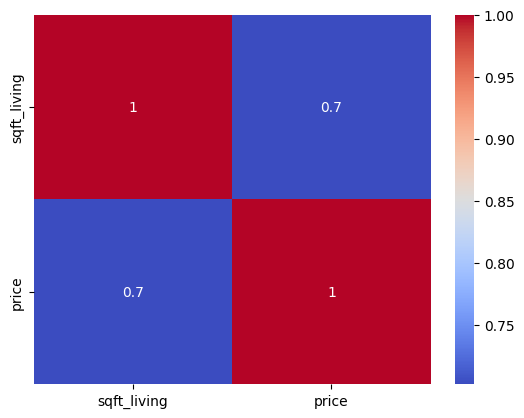

In [11]:
#https://seaborn.pydata.org/tutorial/color_palettes.html
# Matriz de Correlación pies_cuadrados vs precio.

columns = df3[['sqft_living', 'price']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

Como suponíamos, existe una correlación alta entre los pies cuadrados habitables de una propiedad y su precio de venta.

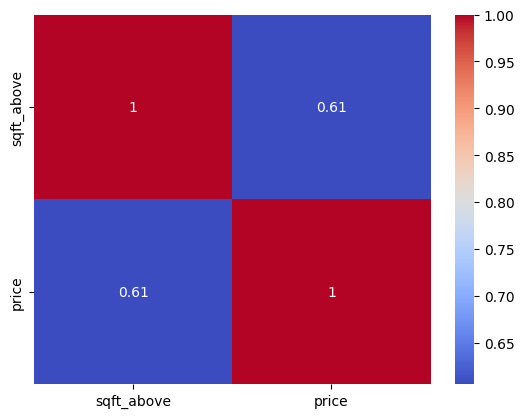

In [12]:
columns = df3[['sqft_above', 'price']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

Los pies cuadrados de los pisos superiores (>1), tienen cierto grado de correlación (no tan alto como los pies cuadrados totales habitables) con el precio de la propiedad.

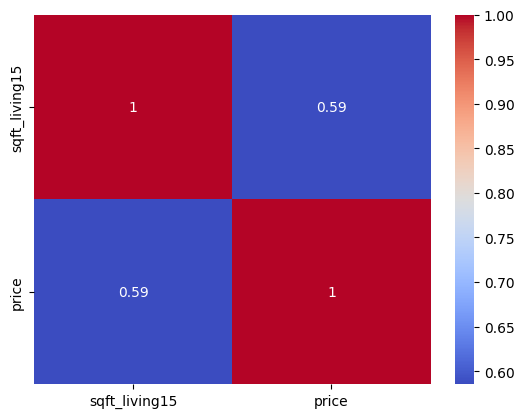

In [13]:
columns = df3[['sqft_living15', 'price']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

Los pies cuadrados de las 15 propiedades más cercanas, también tiene un buen grado de correlación (no tan alto) con el precio de la propiedad.

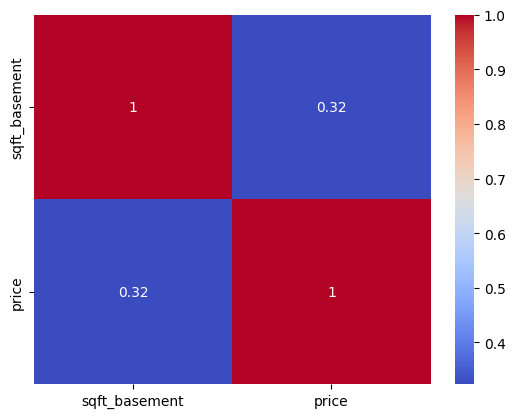

In [14]:
columns = df3[['sqft_basement', 'price']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

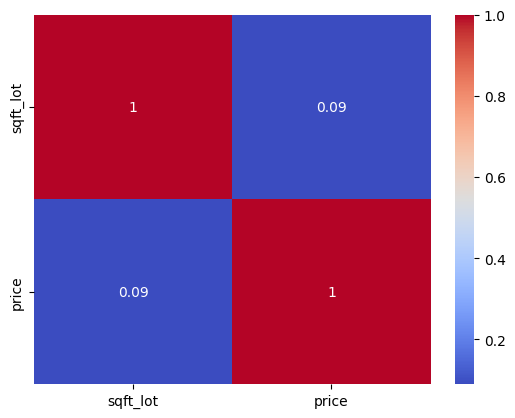

In [15]:
columns = df3[['sqft_lot', 'price']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

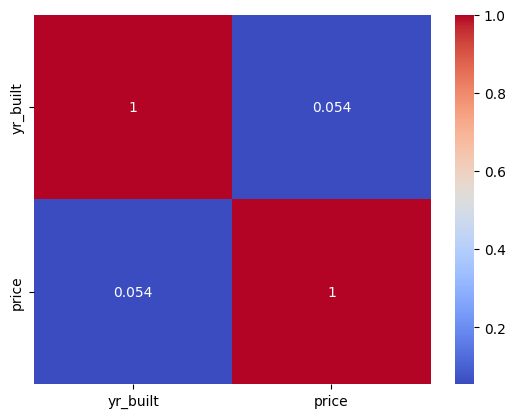

In [16]:
columns = df3[['yr_built', 'price']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

El resto de las variables numéricas no presentan correlaciones considerables con respecto a la variable objetivo (independiente).

Text(0, 0.5, 'precio_USD')

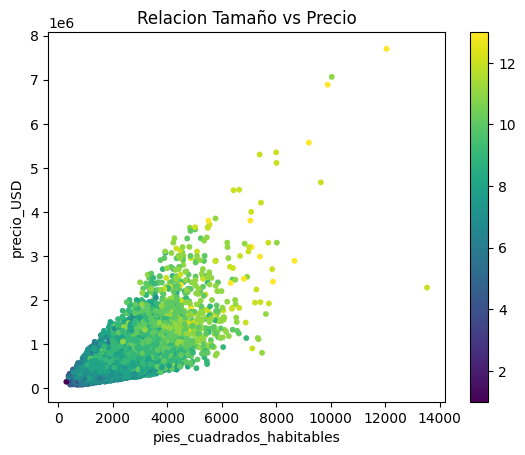

In [17]:
fig, ax = plt.subplots()
grafico = ax.scatter(df3['sqft_living'], df3['price'], c=df3.grade,s=10)
fig.colorbar(grafico)
ax.set_title('Relacion Tamaño vs Precio')
ax.set_xlabel('pies_cuadrados_habitables')
ax.set_ylabel('precio_USD')

Text(0, 0.5, 'precio_USD')

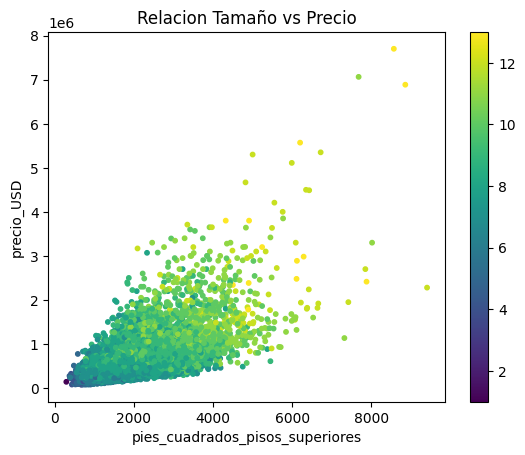

In [18]:
fig, ax = plt.subplots()
grafico = ax.scatter(df3['sqft_above'], df3['price'], c=df3.grade,s=10)
fig.colorbar(grafico)
ax.set_title('Relacion Tamaño vs Precio')
ax.set_xlabel('pies_cuadrados_pisos_superiores')
ax.set_ylabel('precio_USD')

Text(0, 0.5, 'precio_USD')

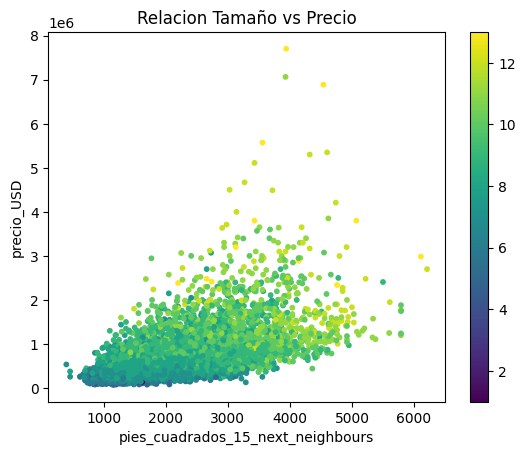

In [19]:
fig, ax = plt.subplots()
grafico = ax.scatter(df3['sqft_living15'], df3['price'], c=df3.grade,s=10)
fig.colorbar(grafico)
ax.set_title('Relacion Tamaño vs Precio')
ax.set_xlabel('pies_cuadrados_15_next_neighbours')
ax.set_ylabel('precio_USD')

En gral, existe una correlacion directa entre el tamaño de una propiedad y su precio, lo cual puede verse reflejado también a través de la calificación de esta ('grade'), en donde en gral, propiedades mejor calificadas y más grandes, deberían tener un precio mayor.

# Variables Categóricas.

In [20]:
df3.groupby(['grade'])['price'].describe().round(1)

C:\Users\220890\AppData\Local\Temp\ipykernel_8812\3231087079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(['grade'])['price'].describe().round(1)


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
1,1.0,142000.0,NaN,142000.0,142000.0,142000.0,142000.0,142000.0
3,3.0,205666.7,113518.0,75000.0,168500.0,262000.0,271000.0,280000.0
4,29.0,214381.0,94306.2,80000.0,145000.0,205000.0,265000.0,435000.0
5,242.0,248524.0,118100.3,78000.0,175000.0,228700.0,295750.0,795000.0
6,2038.0,301919.6,122970.3,82000.0,215037.5,275276.5,366837.5,1200000.0
7,8981.0,402590.3,155876.9,90000.0,285000.0,375000.0,485000.0,2050000.0
8,6068.0,542852.8,217473.4,140000.0,390000.0,510000.0,640000.0,3070000.0
9,2615.0,773513.2,316120.1,230000.0,571500.0,720000.0,880000.0,2700000.0
10,1134.0,1071771.1,483545.1,316000.0,768087.5,914327.0,1250000.0,3600000.0


In [21]:
df3.groupby(['condition'])['price'].describe().round(1)

C:\Users\220890\AppData\Local\Temp\ipykernel_8812\182162788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(['condition'])['price'].describe().round(1)


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,30.0,334431.7,271172.8,78000.0,160000.0,262500.0,431125.0,1500000.0
2,172.0,327287.1,245418.4,80000.0,189750.0,279000.0,397300.0,2555000.0
3,14031.0,542012.6,364449.1,75000.0,329500.0,450000.0,640000.0,7062500.0
4,5679.0,521200.4,358516.2,89000.0,305000.0,440000.0,625000.0,7700000.0
5,1701.0,612418.1,410971.9,110000.0,350000.0,526000.0,725000.0,3650000.0


In [22]:
df3.groupby(['grade','condition'])['price'].describe().round(1)

C:\Users\220890\AppData\Local\Temp\ipykernel_8812\2712451151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(['grade','condition'])['price'].describe().round(1)


count       mean        std        min        25%  \
grade condition                                                       
1     1             1.0   142000.0        NaN   142000.0   142000.0   
3     2             1.0   280000.0        NaN   280000.0   280000.0   
      3             1.0    75000.0        NaN    75000.0    75000.0   
      5             1.0   262000.0        NaN   262000.0   262000.0   
4     1             1.0   150000.0        NaN   150000.0   150000.0   
      2             5.0   179600.0    97664.2    80000.0   120000.0   
      3            13.0   210000.0    91871.3    90000.0   152000.0   
      4            10.0   243905.0   100236.1   100000.0   155000.0   
5     1             9.0   280833.3   219718.0    78000.0   105500.0   
      2            15.0   206166.7    94011.5    82500.0   140000.0   
      3           100.0   246993.5   124817.8    83000.0   150000.0   
      4            84.0   245299.0    97637.6    95000.0   185675.0   
      5            34.0   271127.6   118455.4   150000.0   202250.0   
6     1            11.0   303813.6   136757.7   125000.0   231000.0   
      2            59.0   269483.9   152513.9    95000.0   171250.0   
      3          1035.0   290651.8   113655.6    82000.0   212312.5   
      4           685.0   318731.6   130538.8    89000.0   222000.0   
      5           248.0   310140.9   124855.5   110000.0   219987.5   
7     1             6.0   334416.7   136070.0   130000.0   242000.0   
      2            75.0   342698.5   171715.8   147400.0   234000.0   
      3          5234.0   385666.8   143549.5    90000.0   281000.0   
      4          2833.0   412923.1   163407.7   115000.0   281000.0   
      5           833.0   479667.7   174783.5   161500.0   344900.0   
8     1             2.0   932500.0   802566.2   365000.0   648750.0   
      2            13.0   421996.2   146035.1   188000.0   290000.0   
      3          4269.0   510102.8   191362.7   140000.0   377000.0   
      4          1394.0   589527.3   241504.6   149900.0   419250.0   
      5           390.0   736538.0   257326.2   215000.0   576000.0   
9     2             2.0   715000.0   190918.8   580000.0   647500.0   
      3          2041.0   726587.8   279019.4   230000.0   555000.0   
      4           446.0   889664.5   365444.1   260000.0   666250.0   
      5           126.0  1123419.9   368709.8   415000.0   862000.0   
10    2             2.0  1752500.0  1134906.4   950000.0  1351250.0   
      3           921.0  1012934.1   433695.8   316000.0   751305.0   
      4           156.0  1176284.6   518283.9   396500.0   808750.0   
      5            55.0  1735830.4   591172.4   760000.0  1320000.0   
11    3           332.0  1414401.4   661556.6   420000.0   995000.0   
      4            56.0  1839916.4   753472.3   575000.0  1271000.0   
      5            11.0  2238477.3   829737.6  1050000.0  1550000.0   
12    3            74.0  2138601.1  1009922.5   835000.0  1488500.0   
      4            13.0  2467961.5  1180421.7  1100000.0  1578000.0   
      5             3.0  2290000.0   898387.4  1580000.0  1785000.0   
13    3            11.0  3338636.4  1550658.8  1780000.0  2400000.0   
      4             2.0  5750000.0  2757716.4  3800000.0  4775000.0   

                       50%        75%        max  
grade condition                                   
1     1           142000.0   142000.0   142000.0  
3     2           280000.0   280000.0   280000.0  
      3            75000.0    75000.0    75000.0  
      5           262000.0   262000.0   262000.0  
4     1           150000.0   150000.0   150000.0  
      2           145000.0   228000.0   325000.0  
      3           205000.0   247000.0   435000.0  
      4           238525.0   346500.0   355000.0  
5     1           190000.0   445000.0   658000.0  
      2           180000.0   292500.0   365000.0  
      3           234475.0   300250.0   795000.0  
      4           229975.0   287000.0   715000.0  
      5           227450.0   275750.0

Al analizar las variables categóricas que de acuerdo a su descripción y lógica, deberían incidir de manera directa en el precio de la propiedad ('grade','condition'), sin embargo, se puede ver que las categorías (1,2,3,4) de grade son poco representativas, mientras que la categoría (1) de condition es poco representativa. 

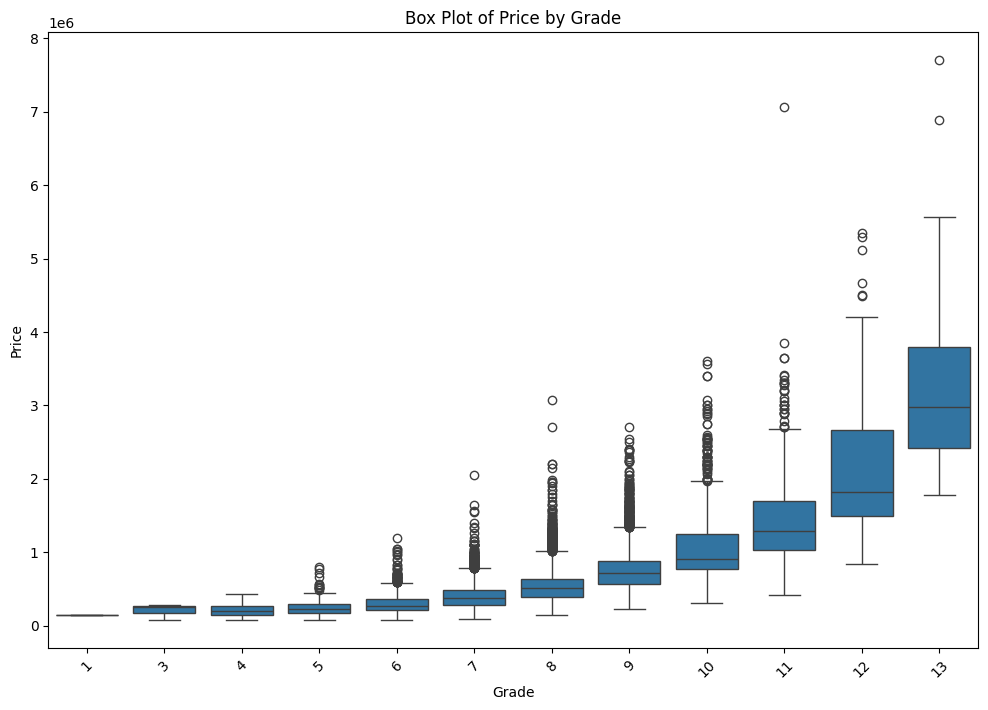

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', data=df3)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Box Plot of Price by Grade')
plt.xticks(rotation=45)
plt.show()

La condición de la propiedad se correlaciona de buena manera con el precio, a medida que aumenta esta, el rango de precios también.

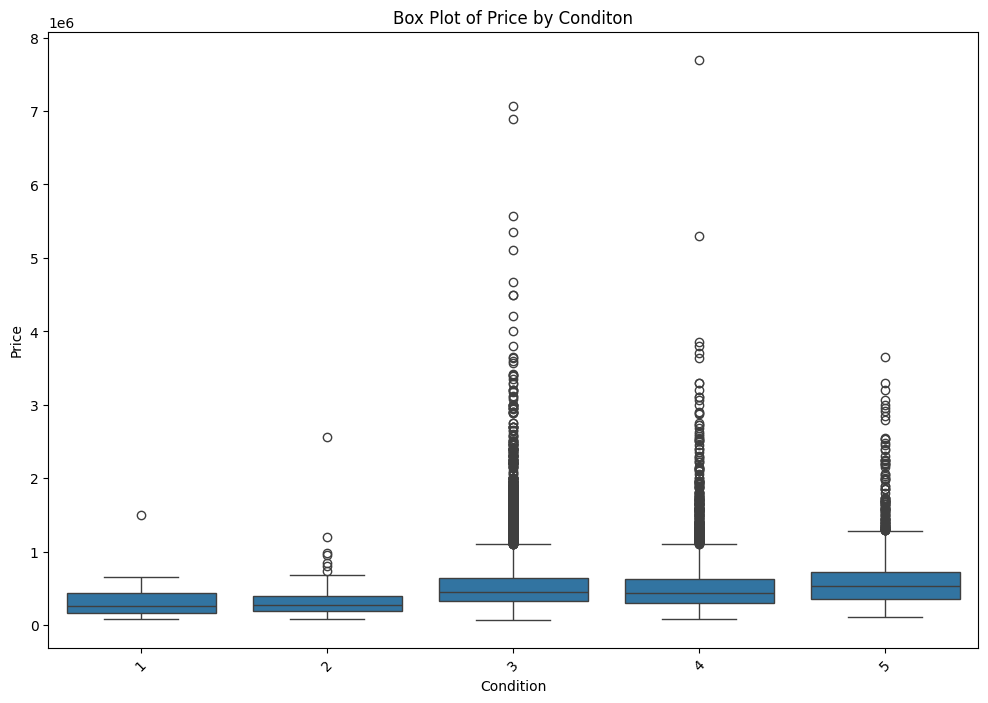

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='condition', y='price', data=df3)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Box Plot of Price by Conditon')
plt.xticks(rotation=45)
plt.show()

Sin embargo, para el caso de condition, esta correlación no es tan alta y suele ser un poco inconclusa, al comparar los rangos de los niveles intercuartiles entre las categorías (3,4,5)

# Identificación y Tratamiento de Outliers (Valores Atípicos) - Variables Independientes.

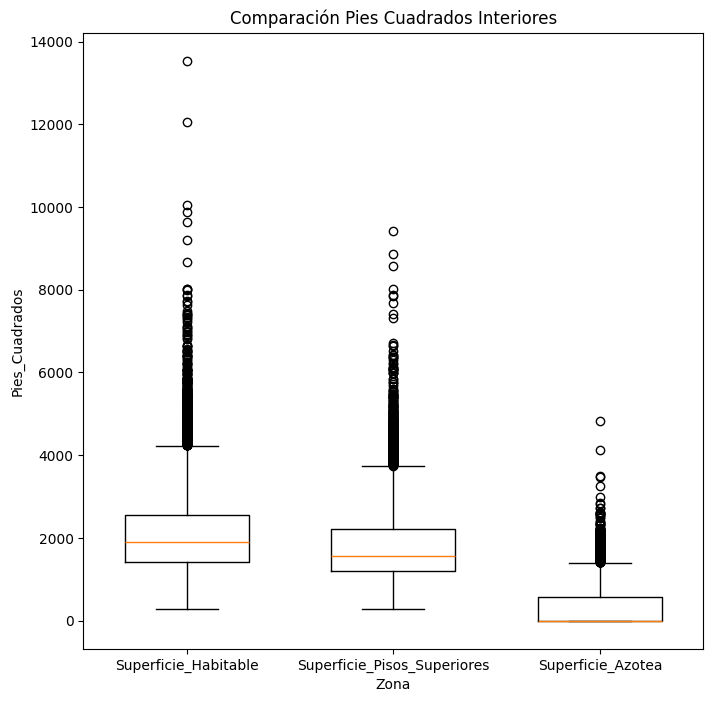

In [25]:
# Outliers (Valores Atípicos)
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df3['sqft_living'], positions=[1], widths=0.6)
ax.boxplot(df3['sqft_above'], positions=[2], widths=0.6)
ax.boxplot(df3['sqft_basement'], positions=[3], widths=0.6)
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Superficie_Habitable','Superficie_Pisos_Superiores','Superficie_Azotea'])
ax.set_title('Comparación Pies Cuadrados Interiores')
ax.set_xlabel('Zona')
ax.set_ylabel('Pies_Cuadrados')
ax.autoscale(axis='y')
plt.show()


In [26]:
df3[['sqft_living','sqft_above','sqft_basement','sqft_lot']].describe().round(1)

,sqft_living,sqft_above,sqft_basement,sqft_lot
count,21613.0,21613.0,21613.0,21613.0
mean,2079.9,1788.4,291.5,15107.0
std,918.4,828.1,442.6,41420.5
min,290.0,290.0,0.0,520.0
25%,1427.0,1190.0,0.0,5040.0
50%,1910.0,1560.0,0.0,7618.0
75%,2550.0,2210.0,560.0,10688.0
max,13540.0,9410.0,4820.0,1651359.0


Considerando que 1 metro cuadrado = 10.76 pies cuadrados, los valores máximos y minimos de las siguientes variables en teoría no deberían ser considerados como outliers.

1. sqft_living: Max: 13,540 (1258 m2), Min: 290 (27 m2)
2. sqft_above: Max: 9,410 (874 m2), Min: 290 (27 m2)
3. sqft_basement: Max: 4,820 (448 m2), Min: 0 (sin azotea)
4. sqft_lot: Max: 1,650,000 (153,346 m2 = 16.33 Hectareas), Min: 520 (48 m2)

Por lo tanto, no vale la pena descartarlos, sino, tenerlos en consideración como variables desviadas a ser estudiadas en mayor profundidad y posiblemente utilizar métodos de tratamiento más avanzados para el reemplazo de estos.

In [27]:
df3[df3['sqft_lot']==1.651359e+06]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
1719,1020069017,700000,4,1,1300,1651359,1,0,3,4,...,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,2015


In [28]:
df3.sort_values('sqft_lot', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
1719,1020069017,700000,4,1,1300,1651359,1,0,3,4,...,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,2015
17319,3326079016,190000,2,1,710,1164794,1,0,0,2,...,710,0,1915,0,98014,47.6888,-121.909,1680,16730,2015
7647,2623069031,542500,5,3,3010,1074218,1,0,0,5,...,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825,2014
7769,2323089009,855000,4,3,4030,1024068,2,0,0,3,...,4030,0,2006,0,98045,47.4619,-121.744,1830,11700,2015
3949,722069232,998000,4,3,3770,982998,2,0,0,3,...,3770,0,1992,0,98058,47.4140,-122.087,2290,37141,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20604,7899800857,256950,2,2,1070,635,2,0,0,3,...,720,350,2008,0,98106,47.5212,-122.357,1070,928,2014
3452,2559950110,1234570,2,2,2470,609,3,0,0,3,...,1910,560,2011,0,98112,47.6182,-122.312,2440,1229,2015
7589,6371000026,367500,2,2,1030,600,2,0,0,3,...,680,350,2004,0,98116,47.5788,-122.410,1120,1267,2015
5826,1773101159,250000,3,2,1050,572,2,0,0,3,...,740,310,2006,0,98106,47.5549,-122.363,1260,1062,2015


El Valor Máximo de sqft_lot podría ser considerado como un Outlier, sin embargo, al revisar el data set, podemos ver que las propiedades con mayor terreno fueron construídas en 1920, 1925 y 1931, por lo tanto, estas pueden haber sido fincas con grandes terrenos asociados.

In [29]:
# Variable Dependiente: sqft_living
# Identificamos los valores atípicos del los pies cuadrados habitables de acuerdo al modelo Z-Score (Estandarización). 
# Estandarizamos los valores de la variable, para poder comparar todos los valores bajo una misma regla, haciendo más fácil la identificación de valores atípicos.

df3['sqft_living_z'] = (df3['sqft_living'] - df3['sqft_living'].mean())/df3['sqft_living'].std()
df3['sqft_living_outliers'] = 0
df3.loc[(df3['sqft_living_z']>3)|(df3['sqft_living_z']<-3) , 'sqft_living_outliers'] = 1
df3[['sqft_living', 'sqft_living_z','sqft_living_outliers']]

,sqft_living,sqft_living_z,sqft_living_outliers
0,1180,-0.979812,0
1,2570,0.533622,0
2,770,-1.426221,0
3,1960,-0.130547,0
4,1680,-0.435412,0
...,...,...,...
21608,1530,-0.598732,0
21609,2310,0.250534,0
21610,1020,-1.154021,0
21611,1600,-0.522516,0


In [30]:
df3['sqft_living_outliers'].value_counts()

sqft_living_outliers
0    21365
1      248
Name: count, dtype: int64

In [31]:
print(df3.loc[df3['sqft_living_outliers']== 1, 'sqft_living'])

5        5420
153      5180
269      5050
270      5310
419      6070
         ... 
21520    4920
21521    5150
21530    5090
21576    4850
21590    4910
Name: sqft_living, Length: 248, dtype: int64


In [32]:
print(df3.loc[df3['sqft_living_outliers'] == 1, 'sqft_living'].max())
print(df3.loc[df3['sqft_living_outliers'] == 1, 'sqft_living'].min())

13540
4850


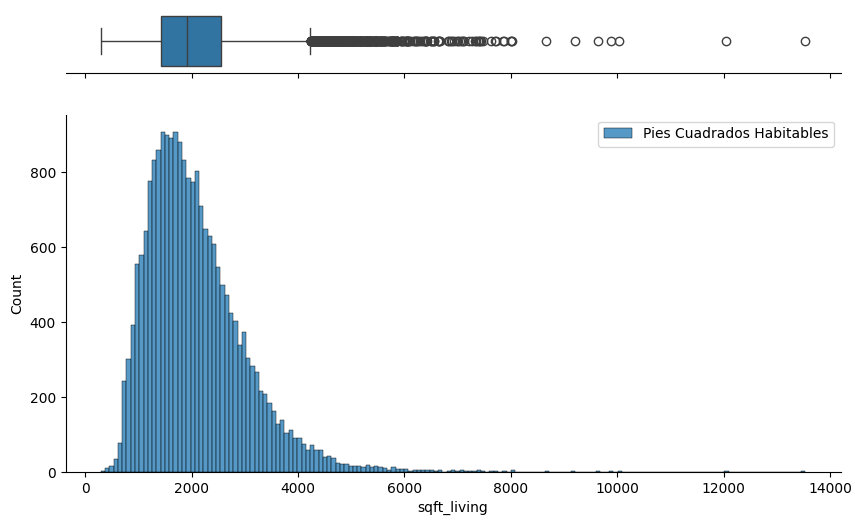

In [33]:
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df3['sqft_living'], ax=ax_box, orient="h") 
sns.histplot(df3['sqft_living'], ax=ax_hist, label='Pies Cuadrados Habitables')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Se puede ver que la totalidad de los valores atípicos se concentran sobre el extremo superior (Outliers). 

Limite Inferior: Q1−1.5×IQR
Limite Superior: Q3+1.5×IQR

In [34]:
# Creamos un diccionario con la agrupación de las categorías pisos, habitaciones y baños. 
mapping_dict = df3.set_index(['floors','bedrooms','bathrooms'])['sqft_living'].to_dict()
mapping_dict

{(1, 3, 1): 1500,
 (2, 3, 2): 1600,
 (1, 2, 1): 1130,
 (1, 4, 3): 4910,
 (1, 3, 2): 1450,
 (1, 4, 4): 3650,
 (1, 5, 2): 2410,
 (2, 4, 3): 3510,
 (1, 4, 1): 1200,
 (2, 5, 2): 3600,
 (2, 3, 1): 1140,
 (2, 4, 2): 2310,
 (3, 2, 1): 1020,
 (1, 4, 2): 1870,
 (2, 5, 3): 4470,
 (3, 3, 1): 1160,
 (1, 5, 3): 2360,
 (2, 4, 4): 4420,
 (2, 3, 3): 2780,
 (2, 2, 2): 1590,
 (2, 2, 1): 1210,
 (2, 5, 1): 3360,
 (3, 3, 3): 1680,
 (1, 3, 3): 1670,
 (3, 4, 3): 2840,
 (3, 3, 2): 1530,
 (2, 4, 1): 1500,
 (1, 1, 1): 390,
 (1, 2, 0): 720,
 (2, 6, 3): 2390,
 (1, 2, 2): 2700,
 (1, 6, 2): 2000,
 (2, 5, 4): 4850,
 (1, 1, 0): 740,
 (1, 4, 5): 5310,
 (1, 5, 1): 1820,
 (2, 6, 1): 2380,
 (3, 2, 2): 1530,
 (2, 3, 4): 3850,
 (2, 6, 5): 2732,
 (2, 7, 3): 3890,
 (2, 2, 3): 1160,
 (3, 4, 2): 3950,
 (2, 6, 2): 3206,
 (1, 5, 4): 1680,
 (3, 0, 0): 1470,
 (2, 1, 1): 1180,
 (1, 7, 3): 2830,
 (1, 6, 4): 3810,
 (2, 5, 5): 4490,
 (2, 6, 6): 6260,
 (1, 6, 3): 4440,
 (1, 3, 0): 1240,
 (2, 1, 2): 1070,
 (2, 8, 5): 2800,
 (3, 5, 4): 4

In [35]:
# Valores promedio por agrupación:
# Existen valores Nulos, en los cuales no hay un valor representativo en la intersección entre 'floors', 'bedrooms', 'bathrooms'
average_sqft_dict = df3.groupby(['floors','bedrooms','bathrooms'])['sqft_living'].mean().to_dict()
average_sqft_dict

{(1, 0, 0): 506.0,
 (1, 0, 1): 390.0,
 (1, 0, 2): nan,
 (1, 0, 3): nan,
 (1, 0, 4): nan,
 (1, 0, 5): nan,
 (1, 0, 6): nan,
 (1, 0, 7): nan,
 (1, 0, 8): nan,
 (1, 1, 0): 689.3548387096774,
 (1, 1, 1): 852.0952380952381,
 (1, 1, 2): 1696.0,
 (1, 1, 3): nan,
 (1, 1, 4): nan,
 (1, 1, 5): nan,
 (1, 1, 6): nan,
 (1, 1, 7): nan,
 (1, 1, 8): nan,
 (1, 2, 0): 897.0,
 (1, 2, 1): 1128.0200951877314,
 (1, 2, 2): 1712.4809523809524,
 (1, 2, 3): 2746.6666666666665,
 (1, 2, 4): nan,
 (1, 2, 5): nan,
 (1, 2, 6): nan,
 (1, 2, 7): nan,
 (1, 2, 8): nan,
 (1, 3, 0): 1075.3333333333333,
 (1, 3, 1): 1481.21103117506,
 (1, 3, 2): 1953.6325178389397,
 (1, 3, 3): 2675.4893617021276,
 (1, 3, 4): nan,
 (1, 3, 5): nan,
 (1, 3, 6): nan,
 (1, 3, 7): nan,
 (1, 3, 8): nan,
 (1, 4, 0): 1700.0,
 (1, 4, 1): 1825.9505862646565,
 (1, 4, 2): 2287.795357361026,
 (1, 4, 3): 3048.1762114537446,
 (1, 4, 4): 3750.0,
 (1, 4, 5): 5879.0,
 (1, 4, 6): nan,
 (1, 4, 7): nan,
 (1, 4, 8): nan,
 (1, 5, 0): nan,
 (1, 5, 1): 2057.53535353

In [36]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor de los pies cuadrados sea un Outlier.
def replace_sqft_with_average(row, average_sqft_dict):
    if row['sqft_living_outliers'] == 1:
        return average_sqft_dict.get((row['floors'], row['bedrooms'], row['bathrooms']), row['sqft_living'])
    return row['sqft_living']

# Reemplazamos los pies cuadrados por el Promedio.
df3['sqft_living'] = df3.apply(replace_sqft_with_average, axis=1, args=(average_sqft_dict,))

df3_sqft_updated = df3[df3['sqft_living_outliers'] == 1]

In [37]:
df3_sqft_updated.groupby(['floors','bathrooms','bedrooms'])['sqft_living'].describe().round(1)

count     mean  std      min      25%      50%  \
floors bathrooms bedrooms                                                   
1      2         4           4.0   2287.8  0.0   2287.8   2287.8   2287.8   
                 5           1.0   2548.7  NaN   2548.7   2548.7   2548.7   
                 6           1.0   2818.6  NaN   2818.6   2818.6   2818.6   
       3         4           7.0   3048.2  0.0   3048.2   3048.2   3048.2   
                 5           3.0   3069.8  0.0   3069.8   3069.8   3069.8   
                 6           1.0   3035.5  NaN   3035.5   3035.5   3035.5   
                 3           1.0   2675.5  NaN   2675.5   2675.5   2675.5   
       4         4           4.0   3750.0  0.0   3750.0   3750.0   3750.0   
                 5           2.0   3620.0  0.0   3620.0   3620.0   3620.0   
                 6           1.0   3331.4  NaN   3331.4   3331.4   3331.4   
                 7           1.0   3928.0  NaN   3928.0   3928.0   3928.0   
       5         4           4.0   5879.0  0.0   5879.0   5879.0   5879.0   
                 5           2.0   6412.0  0.0   6412.0   6412.0   6412.0   
       6         5           1.0   9640.0  NaN   9640.0   9640.0   9640.0   
2      2         4           4.0   2630.8  0.0   2630.8   2630.8   2630.8   
                 5           1.0   2907.0  NaN   2907.0   2907.0   2907.0   
                 6           1.0   3242.5  NaN   3242.5   3242.5   3242.5   
                 3           2.0   2103.3  0.0   2103.3   2103.3   2103.3   
       3         4          36.0   3445.7  0.0   3445.7   3445.7   3445.7   
                 5          27.0   3615.6  0.0   3615.6   3615.6   3615.6   
                 6           3.0   3296.6  0.0   3296.6   3296.6   3296.6   
                 3           7.0   2664.1  0.0   2664.1   2664.1   2664.1   
                 7           2.0   4157.1  0.0   4157.1   4157.1   4157.1   
       4         4          39.0   4487.3  0.0   4487.3   4487.3   4487.3   
                 5          28.0   4624.5  0.0   4624.5   4624.5   4624.5   
                 6          13.0   4430.6  0.0   4430.6   4430.6   4430.6   
                 3           3.0   3877.9  0.0   3877.9   3877.9   3877.9   
                 7           2.0   4201.4  0.0   4201.4   4201.4   4201.4   
       5         4           9.0   5609.2  0.0   5609.2   5609.2   5609.2   
                 5          11.0   5955.3  0.0   5955.3   5955.3   5955.3   
                 6           3.0   4202.2  0.0   4202.2   4202.2   4202.2   
                 7           1.0   5165.0  NaN   5165.0   5165.0   5165.0   
       6         5           7.0   7270.0  0.0   7270.0   7270.0   7270.0   
                 6           2.0   6825.0  0.0   6825.0   6825.0   6825.0   
                 7           1.0   7480.0  NaN   7480.0   7480.0   7480.0   
       1         2           1.0   1274.2  NaN   1274.2   1274.2   1274.2   
       7         6           1.0   9890.0  NaN   9890.0   9890.0   9890.0   
       8         6           1.0  12050.0  NaN  12050.0  12050.0  12050.0   
3      3         5           1.0   3608.6  NaN   3608.6   3608.6   3608.6   
       4         4           2.0   4080.0  0.0   4080.0   4080.0   4080.0   
                 5           3.0   4922.5  0.0   4922.5   4922.5   4922.5   
                 6           1.0   4456.4  NaN   4456.4   4456.4   4456.4   
                 3           1.0   3093.3  NaN   3093.3   3093.3   3093.3   
                 8           1.0   7710.0  NaN   7710.0   7710.0   7710.0   
       8         7           1.0  13540.0  NaN  13540.0  13540.0  13540.0   

                               75%      max  
floors bathrooms bedrooms                    
1      2         4          2287.8   2287.8  
                 5          2548.7   2548.7  
                 6          2818.6   2818.6  
       3         4          3048.2   3048.2  
                 5          3069.8   3069.8  
                 6          3035.5   3035.5  
                 3          2675.5   26

In [38]:
df3[df3['sqft_living_outliers'] == 1]['sqft_living'].sort_values(ascending=False).round(1)

12777    13540.0
7252     12050.0
9254      9890.0
8092      9640.0
18477     7710.0
          ...   
6392      2287.8
10980     2287.8
540       2103.3
5029      2103.3
2444      1274.2
Name: sqft_living, Length: 248, dtype: float64

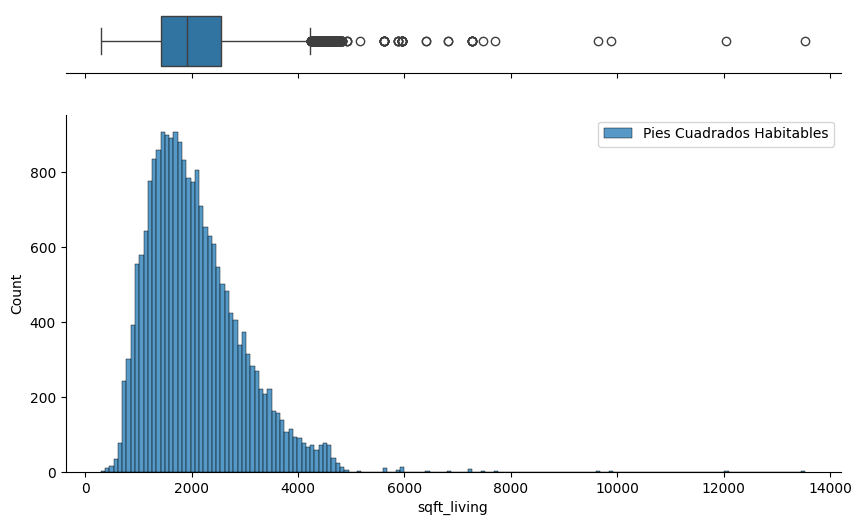

In [39]:
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df3['sqft_living'], ax=ax_box, orient="h") 
sns.histplot(df3['sqft_living'], ax=ax_hist, label='Pies Cuadrados Habitables')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Revisamos que los valores reemplazados sean consistentes.
Como se puede ver, estos se ajustaron de mejor manera al extremo superior, disminuyendo la variabilidad, mientras que aquellos que eran Outliers reales, son justificados a través de las variables categóricas.

# Identificación de Outliers (Valores Atípicos) - Variable Dependiente (Objetivo).

In [40]:
# Variable Objetivo: Price
# Identificamos los valores atípicos del precio de acuerdo al modelo Z-Score (Estandarización). 

df3['price_z'] = (df3['price'] - df3['price'].mean())/df3['price'].std()
df3['price_outliers'] = 0
df3.loc[(df3['price_z']>3)|(df3['price_z']<-3) , 'price_outliers'] = 1
df3[['price', 'price_z','price_outliers']]

,price,price_z,price_outliers
0,221900,-0.866697,0
1,538000,-0.005688,0
2,180000,-0.980827,0
3,604000,0.174086,0
4,510000,-0.081956,0
...,...,...,...
21608,360000,-0.490533,0
21609,400000,-0.381579,0
21610,402101,-0.375856,0
21611,400000,-0.381579,0


In [41]:
df3['price_outliers'].value_counts()

price_outliers
0    21207
1      406
Name: count, dtype: int64

In [42]:
print(df3.loc[df3['price_outliers']== 1, 'price'])

21       2000000
153      2250000
246      2400000
269      2900000
282      2050000
          ...   
21514    1865000
21530    3000000
21540    1881580
21568    1700000
21576    3567000
Name: price, Length: 406, dtype: int64


In [43]:
print(df3.loc[df3['price_outliers'] == 1, 'price'].max())
print(df3.loc[df3['price_outliers'] == 1, 'price'].min())

7700000
1646000


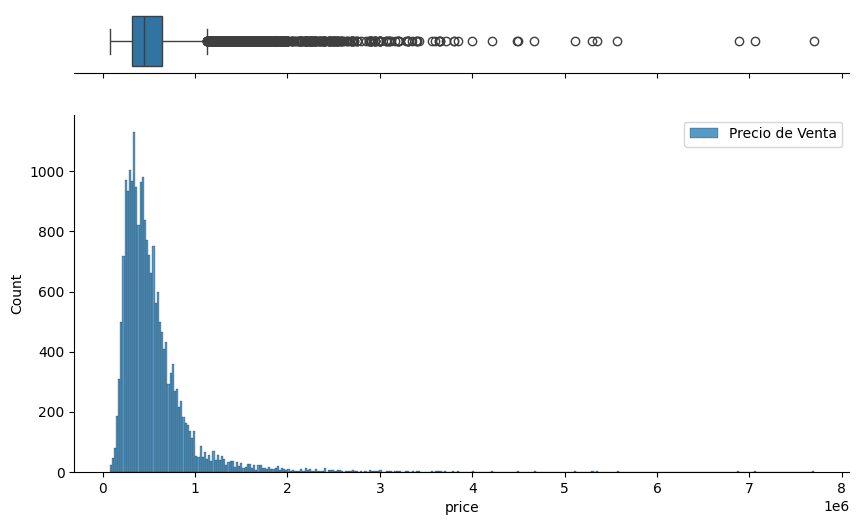

In [44]:
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df3['price'], ax=ax_box, orient="h") 
sns.histplot(df3['price'], ax=ax_hist, label='Precio de Venta')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Si analizamos los valores máximos y mínimos de los outliers de precios, los cuales se encuentran todos sobre el Extremo Superior, no es tan descabellado pensar que el rango de precios de valores atípicos se encuentre entre los siguientes márgenes:

1. Máx: $ USD 7,700,000 (Siete Millones, Setecientos Mil Dólares)
2. Mín: $ USD 1,646,000 (Un Millon, Seisciencitos Cuarenta y Seis Mil Dólares)

Sin embargo, de igual manera utilizaremos herramientas de tratamiento de Outliers, en función Agrupación de Atributos y Diccionarios.

# Metodos de Clasificación y Agrupamiento para Variables Independientes.

# Creación de una Nueva Categoría (Vecindario)

In [45]:
# Estandarización Previo a la Regla del Codo.

from sklearn.preprocessing import StandardScaler

# Convertir a DataFrame para facilitar el manejo
df4 = df3[['lat', 'long']].copy()

# Estandarización de los Datos (los datos deben ser estandarizados ya que al tener las variables de entrada de diferente naturaleza, puede generar ruido en la segmentación.)
# No es estrictamente necesario estandarizar, ya que latitud y longitud se miden bajo la misma unidad de medida, sin embargo, lo haremos de igual manera para obtener una clasificación más precisa.
scaler = StandardScaler()
df4[['lat', 'long']] = scaler.fit_transform(df4[['lat', 'long']])
df4

,lat,long
0,-0.352572,-0.306079
1,1.161568,-0.746341
2,1.283537,-0.135655
3,-0.283288,-1.271816
4,0.409550,1.199335
...,...,...
21608,1.004958,-0.938069
21609,-0.356180,-1.051685
21610,0.247888,-0.604321
21611,-0.184414,1.028910


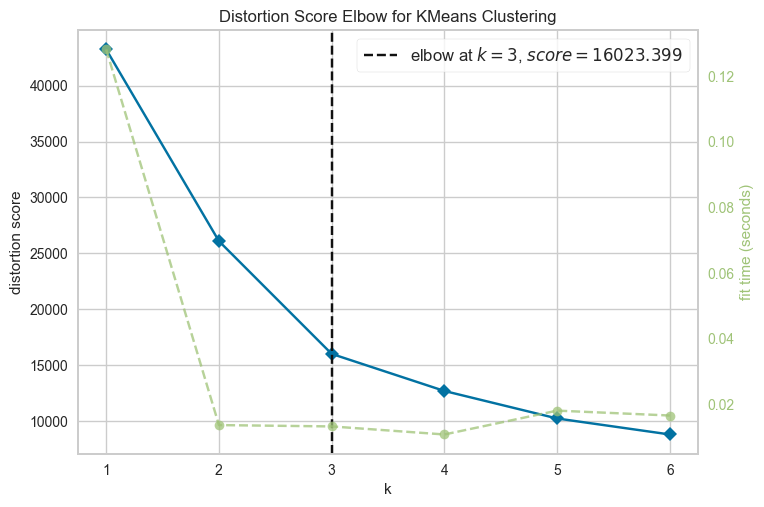

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Regla de Codo

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,7))
visualizer.fit(df4) 
visualizer.show()  

Método del Codo.

Busca representar que tanto se parecen los individuos de un cluster al valor central de este, de esta manera, mientras más similares sean los inidividuos a un cluster, más distantes se encontrarán los clusters que se formen (formación de grupos bien delimitados en donde la distancia entre ellos sea la menor posible).

Se utiliza la suma de los cuadrados dentro de cada grupo.

Su busca un punto en el cual, el valor de la suma de los mínimos cuadrados deje de disminuir de manera drástica (3 Cantidad Óptima de Clusters a Formar) al avanzar por el eje X.

También ajustamos el rango de k (1,7), para obtener el mejor score bajo un mismo k.

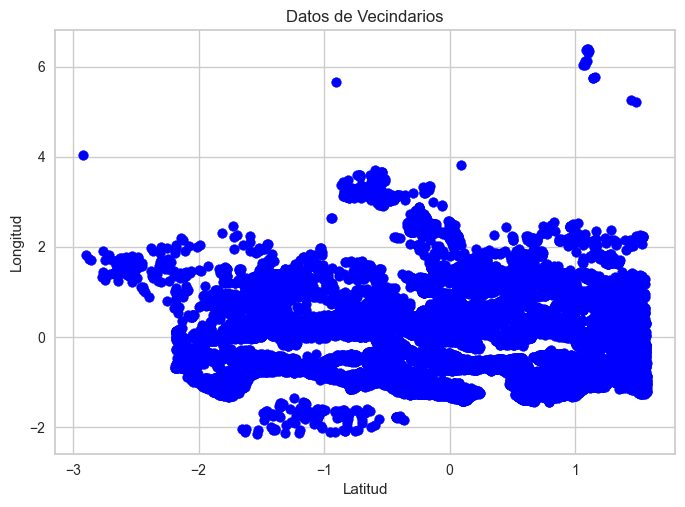

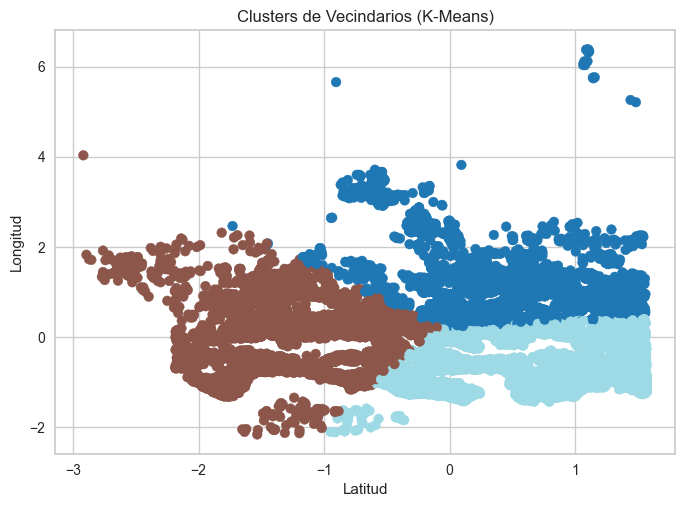

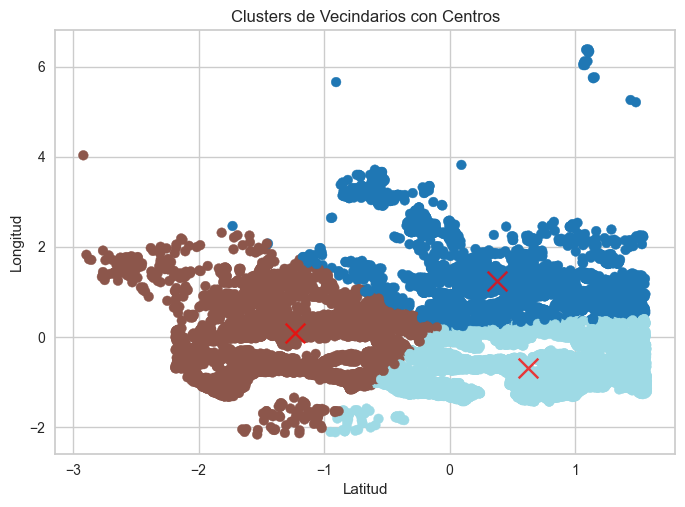

In [47]:
# Utilizamos el método de Clasificación de K-Means para identificar los Vecindarios.

# Visualización de los datos originales
plt.scatter(df4['lat'], df4['long'], c='blue', marker='o')
plt.title('Datos de Vecindarios')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, max_iter=1000, init='random', random_state=1)
df4['cluster_vecindario'] = kmeans.fit_predict(df4)

# Visualización de los Clusters
plt.scatter(df4['lat'], df4['long'], c=df4['cluster_vecindario'], cmap='tab20', marker='o')
plt.title('Clusters de Vecindarios (K-Means)')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

# Centros de los Clusters
centers = kmeans.cluster_centers_
plt.scatter(df4['lat'], df4['long'], c=df4['cluster_vecindario'], cmap='tab20', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('Clusters de Vecindarios con Centros')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

In [48]:
# Asociamos la clasificación del vecindario al Data Frame Inicial. 
df3['cluster_vecindario'] = df4['cluster_vecindario']
df3

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,date,sqft_living_z,sqft_living_outliers,price_z,price_outliers,cluster_vecindario
0,7129300520,221900,3,1,1180.0,5650,1,0,0,3,...,47.5112,-122.257,1340,5650,2014,-0.979812,0,-0.866697,0,1
1,6414100192,538000,3,2,2570.0,7242,2,0,0,3,...,47.7210,-122.319,1690,7639,2014,0.533622,0,-0.005688,0,2
2,5631500400,180000,2,1,770.0,10000,1,0,0,3,...,47.7379,-122.233,2720,8062,2015,-1.426221,0,-0.980827,0,2
3,2487200875,604000,4,3,1960.0,5000,1,0,0,5,...,47.5208,-122.393,1360,5000,2014,-0.130547,0,0.174086,0,2
4,1954400510,510000,3,2,1680.0,8080,1,0,0,3,...,47.6168,-122.045,1800,7503,2015,-0.435412,0,-0.081956,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000,3,2,1530.0,1131,3,0,0,3,...,47.6993,-122.346,1530,1509,2014,-0.598732,0,-0.490533,0,2
21609,6600060120,400000,4,2,2310.0,5813,2,0,0,3,...,47.5107,-122.362,1830,7200,2015,0.250534,0,-0.381579,0,2
21610,1523300141,402101,2,0,1020.0,1350,2,0,0,3,...,47.5944,-122.299,1020,2007,2014,-1.154021,0,-0.375856,0,2
21611,291310100,400000,3,2,1600.0,2388,2,0,0,3,...,47.5345,-122.069,1410,1287,2015,-0.522516,0,-0.381579,0,0


In [49]:
# Creamos un diccionario con la agrupación de 'grade' (nivel de construcción y diseño), 'condition' (estado de la propiedad) y 'cluster_vecindario'
mapping_dict_2 = df3.set_index(['grade','condition','cluster_vecindario'])['price'].to_dict()
mapping_dict_2

{(7, 3, 1): 270000,
 (7, 3, 2): 325000,
 (6, 3, 2): 375000,
 (7, 5, 2): 500000,
 (8, 3, 0): 400000,
 (11, 3, 0): 1222500,
 (7, 4, 2): 399950,
 (7, 4, 0): 450000,
 (9, 3, 2): 1007500,
 (7, 3, 0): 336750,
 (7, 4, 1): 294570,
 (8, 3, 1): 350000,
 (8, 4, 1): 408000,
 (6, 5, 1): 229950,
 (8, 3, 2): 400000,
 (8, 5, 2): 850000,
 (8, 4, 2): 552100,
 (5, 1, 0): 550000,
 (7, 2, 1): 235000,
 (9, 3, 0): 810000,
 (6, 4, 1): 216500,
 (6, 3, 1): 224000,
 (9, 4, 0): 885000,
 (9, 5, 1): 415000,
 (8, 4, 0): 649950,
 (8, 5, 1): 268000,
 (10, 3, 2): 1575000,
 (11, 4, 0): 1063000,
 (7, 5, 1): 465000,
 (10, 4, 0): 1360000,
 (10, 3, 1): 1088000,
 (9, 3, 1): 610685,
 (10, 4, 2): 1950000,
 (7, 5, 0): 650000,
 (9, 5, 2): 1410000,
 (6, 5, 2): 435000,
 (12, 3, 0): 2238890,
 (10, 3, 0): 3567000,
 (5, 5, 1): 189900,
 (6, 4, 2): 245000,
 (9, 4, 2): 1225000,
 (6, 3, 0): 250000,
 (9, 4, 1): 340000,
 (7, 2, 2): 230005,
 (5, 3, 2): 375000,
 (5, 5, 2): 208000,
 (11, 3, 2): 1537000,
 (10, 5, 2): 1356920,
 (6, 4, 0): 28200

In [50]:
# Valores promedio por agrupación:
# Existen valores Nulos, en los cuales no hay un valor representativo en la intersección entre 'grade', 'condition', 'cluster_vecindario'
average_price_dict = df3.groupby(['grade', 'condition', 'cluster_vecindario'])['price'].mean().to_dict()
average_price_dict

{(1, 1, 0): 142000.0,
 (1, 1, 1): nan,
 (1, 1, 2): nan,
 (1, 2, 0): nan,
 (1, 2, 1): nan,
 (1, 2, 2): nan,
 (1, 3, 0): nan,
 (1, 3, 1): nan,
 (1, 3, 2): nan,
 (1, 4, 0): nan,
 (1, 4, 1): nan,
 (1, 4, 2): nan,
 (1, 5, 0): nan,
 (1, 5, 1): nan,
 (1, 5, 2): nan,
 (3, 1, 0): nan,
 (3, 1, 1): nan,
 (3, 1, 2): nan,
 (3, 2, 0): 280000.0,
 (3, 2, 1): nan,
 (3, 2, 2): nan,
 (3, 3, 0): nan,
 (3, 3, 1): 75000.0,
 (3, 3, 2): nan,
 (3, 4, 0): nan,
 (3, 4, 1): nan,
 (3, 4, 2): nan,
 (3, 5, 0): nan,
 (3, 5, 1): 262000.0,
 (3, 5, 2): nan,
 (4, 1, 0): nan,
 (4, 1, 1): 150000.0,
 (4, 1, 2): nan,
 (4, 2, 0): 80000.0,
 (4, 2, 1): 120000.0,
 (4, 2, 2): 232666.66666666666,
 (4, 3, 0): 220000.0,
 (4, 3, 1): 201000.0,
 (4, 3, 2): 216000.0,
 (4, 4, 0): 271250.0,
 (4, 4, 1): 225000.0,
 (4, 4, 2): 229050.0,
 (4, 5, 0): nan,
 (4, 5, 1): nan,
 (4, 5, 2): nan,
 (5, 1, 0): 550000.0,
 (5, 1, 1): 179900.0,
 (5, 1, 2): 359333.3333333333,
 (5, 2, 0): 277500.0,
 (5, 2, 1): 196125.0,
 (5, 2, 2): 194777.77777777778,
 (5, 3

In [51]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor del precio sea un Outlier.
def replace_price_with_average(row, average_price_dict):
    if row['price_outliers'] == 1:
        return average_price_dict.get((row['grade'], row['condition'], row['cluster_vecindario']), row['price'])
    return row['price']

# Reemplazamos el Precio por el Promedio.
df3['price'] = df3.apply(replace_price_with_average, axis=1, args=(average_price_dict,))

df3_price_updated = df3[df3['price_outliers'] == 1]

In [52]:
df3_price_updated.groupby(['cluster_vecindario','condition','grade'])['price'].describe().round(1)


count       mean  std        min  \
cluster_vecindario condition grade                                     
0                  3         9        2.0   738093.2  0.0   738093.2   
                             10      11.0   900339.4  0.0   900339.4   
                             11      15.0  1193877.3  0.0  1193877.3   
                             12      23.0  1664552.8  0.0  1664552.8   
                             13       3.0  2367666.7  0.0  2367666.7   
                   4         10       3.0   959880.2  0.0   959880.2   
                             11       5.0  1528888.9  0.0  1528888.9   
                             12       2.0  1748000.0  0.0  1748000.0   
                   5         10       1.0  1245160.0  NaN  1245160.0   
                             7        1.0   525474.2  NaN   525474.2   
                             8        2.0   701772.5  0.0   701772.5   
1                  3         10       1.0   657037.8  NaN   657037.8   
                             11       3.0  1048550.5  0.0  1048550.5   
                             12       1.0  1457875.0  NaN  1457875.0   
                   4         12       1.0  2125000.0  NaN  2125000.0   
                             8        1.0   383609.4  NaN   383609.4   
2                  3         9       28.0   873003.5  0.0   873003.5   
                             10      67.0  1345621.2  0.0  1345621.2   
                             11      60.0  1939415.9  0.0  1939415.9   
                             12      22.0  3160647.9  0.0  3160647.9   
                             13       8.0  3702750.0  0.0  3702750.0   
                             8       11.0   573619.6  0.0   573619.6   
                   4         9       21.0  1120738.5  0.0  1120738.5   
                             10      25.0  1447398.1  0.0  1447398.1   
                             11      26.0  2066866.3  0.0  2066866.3   
                             12       6.0  3245083.3  0.0  3245083.3   
                             13       2.0  5750000.0  0.0  5750000.0   
                             7        1.0   509175.1  NaN   509175.1   
                             8        2.0   734349.7  0.0   734349.7   
                   5         9       12.0  1201209.9  0.0  1201209.9   
                             10      28.0  1864183.4  0.0  1864183.4   
                             11       7.0  2451333.3  0.0  2451333.3   
                             12       2.0  2290000.0  0.0  2290000.0   
                             8        2.0   809970.3  0.0   809970.3   
                   2         10       1.0  2555000.0  NaN  2555000.0   

                                          25%        50%        75%        max  
cluster_vecindario condition grade                                              
0                  3         9       738093.2   738093.2   738093.2   738093.2  
                             10      900339.4   900339.4   900339.4   900339.4  
                             11     1193877.3  1193877.3  1193877.3  1193877.3  
                             12     1664552.8  1664552.8  1664552.8  1664552.8  
                             13     2367666.7  2367666.7  2367666.7  2367666.7  
                   4         10      959880.2   959880.2   959880.2   959880.2  
                             11     1528888.9  1528888.9  1528888.9  1528888.9  
                             12     1748000.0  1748000.0  1748000.0  1748000.0  
                   5         10     1245160.0  1245160.0  1245160.0  1245160.0  
                             7       525474.2   525474.2   525474.2   525474.2  
                             8       701772.5   701772.5   701772.5   701772.5  
1                  3         10      657037.8   657037.8   657037.8   657037.8  
                             11     1048550.5  1048550.5  1048550.5  1048550.5  
                             12     1457875.0  1457875.0  1457875.0  1457875.0  
                   4         12     2125000.0  2125000.0  2125000.0  212500

In [53]:
df3[df3['price_outliers'] == 1]['price'].sort_values(ascending=False).round(1)

7035     5750000.0
7252     5750000.0
9254     3702750.0
14556    3702750.0
13411    3702750.0
           ...    
7844      573619.6
10263     573619.6
15415     525474.2
17767     509175.1
9175      383609.4
Name: price, Length: 406, dtype: float64

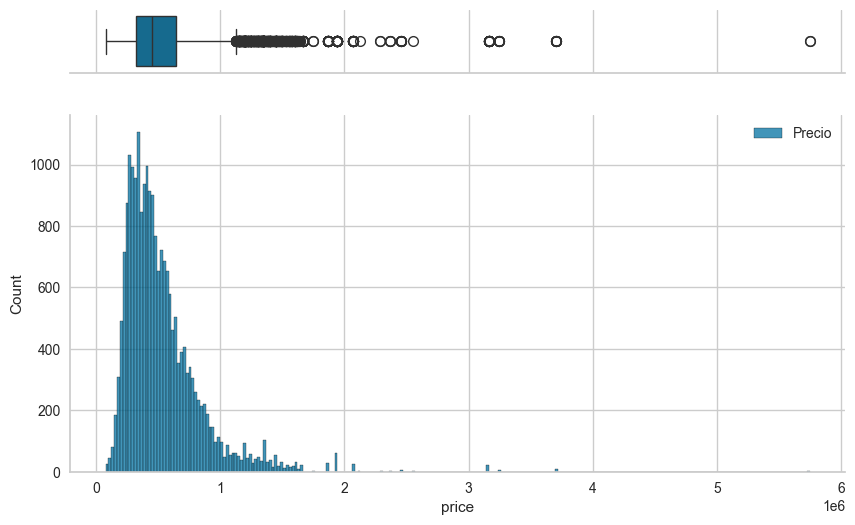

In [54]:
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df3['price'], ax=ax_box, orient="h") 
sns.histplot(df3['price'], ax=ax_hist, label='Precio')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Al igual que la Variable 'sqft_living', el precio de venta se ajustó de mejor manera al extremo superior, disminuyendo la variabilidad, mientras que aquellos precios que eran Outliers reales, son justificados a gracias a la relación con las variables categóricas.

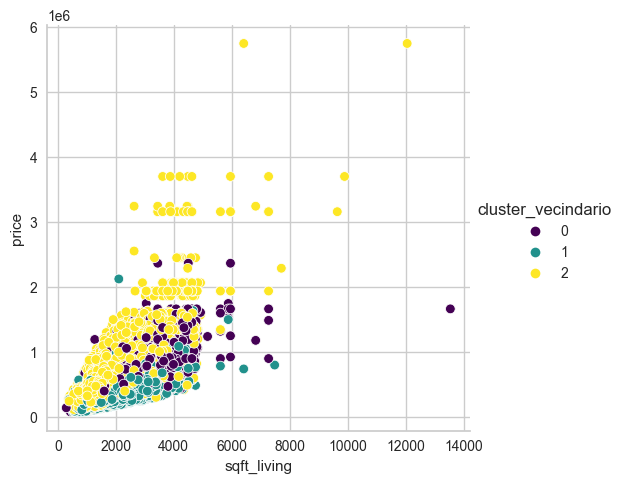

In [55]:
Scatter = sns.relplot(df3, x="sqft_living", y="price", hue="cluster_vecindario", palette="viridis", kind="scatter")

Al revisar la nueva variable categórica creada, a grandes ragos nos damos cuenta en función del número de representantes de cada vecindario, que la relación entre la superficie de la propiedad y el precio, se agrupa de buena manera con los clusters de los vecindarios, correlacionandose positivamente y aumentando en el siguiente orden de vecindarios (1,0,2) 

Si bien, esta claro que el modelo a predecir se debería ajustar de buena manera a una regresión lineal, utilizamos un modelo de clasificación para ayudar al tratamiento de outliers y también a generar una variable categórica (vecindario) en función de variables cuantitativas que no habían sido consideradas en el modelo ('lat','long'), la cual seguramente ayudará a mejorar el poder predictivo del modelo.

# Selección del Algoritmo.
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

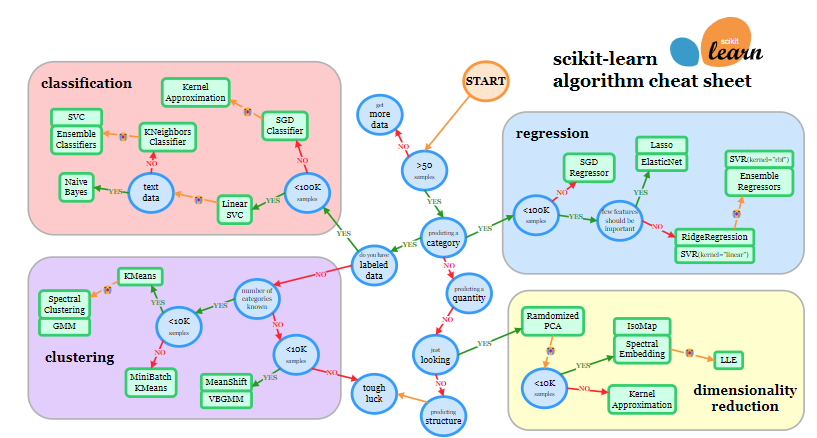

Considerando que la variable objetivo 'price' es cuantitativa numérica, existe cierto grado de correlación con variables independientes numéricas y las variables categóricas inciden de buena manera en la variable objetivo, creo que la mejor alternativa sería generar una regresión lineal multivariada, la cual incluyera en la ecuación, tanto variables cualitativas como cauntitativas.

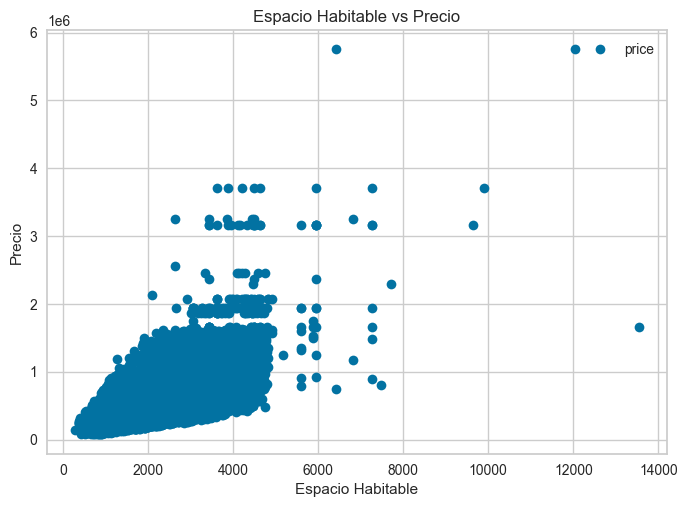

In [56]:
# Graficamos la relación entre es espacio habitable y el precio de la propiedad (mayor correlación entre variables) 

df3.plot(x='sqft_living', y='price', style="o")
plt.title('Espacio Habitable vs Precio')
plt.xlabel('Espacio Habitable')
plt.ylabel('Precio')
plt.show()

En general se puede ver que los datos no se ajustan de buena manera a una regresión lineal de una variable, por lo tanto se espera que los coeficientes de determinación sean bajos. De esta manera, se utilizarán métodos de tratamiento de variables categóricas, las cuales podrían mejorar la asertividad del algoritmo predictivo. 

# Regresión Simple - Aprendizaje Supervisado

In [57]:
import statsmodels.api as sm

# Creamos variables dummy para las variables categóricas principales que inciden de mejor manera en el valor del precio
dummies_grade = pd.get_dummies(df3['grade'], prefix='Calificacion')
dummies_condition = pd.get_dummies(df3['condition'], prefix='Condicion')
dummies_cluster_vecindario = pd.get_dummies(df3['cluster_vecindario'], prefix='Vecindario')
dummies_floors = pd.get_dummies(df3['floors'], prefix='Pisos')
dummies_bedrooms = pd.get_dummies(df3['bedrooms'], prefix='Habitaciones')
dummies_bathrooms = pd.get_dummies(df3['bathrooms'], prefix='Baños')
dummies_view = pd.get_dummies(df3['view'], prefix='Vista')
dummies_waterfront = pd.get_dummies(df3['waterfront'], prefix='Vista_al_Mar')

# Concatenar las variables dummy con el DataFrame original
df3 = pd.concat([df3, dummies_grade, dummies_condition, dummies_cluster_vecindario, dummies_floors, dummies_bedrooms, dummies_bathrooms, dummies_view, dummies_waterfront], axis=1)


Como los modelos de regresión lineal requieren que todas las variables predictoras sean numéricas, convertimos las variables categóricas a dummy (0,1), las cuales indican la presencia o ausencia de dicha categoría en una columna.

Las variables dummy, permiten una interpretación clara de los coeficientes de regresión, de esta manera, cada coeficiente asociado a una variable dummy indica el cambio en la variable dependiente cuando esa categoría está presente, comparado con la categoría de referencia.

In [58]:
booleans = df3.select_dtypes(include='boolean')
print(booleans.columns.tolist())

['Calificacion_1', 'Calificacion_3', 'Calificacion_4', 'Calificacion_5', 'Calificacion_6', 'Calificacion_7', 'Calificacion_8', 'Calificacion_9', 'Calificacion_10', 'Calificacion_11', 'Calificacion_12', 'Calificacion_13', 'Condicion_1', 'Condicion_2', 'Condicion_3', 'Condicion_4', 'Condicion_5', 'Vecindario_0', 'Vecindario_1', 'Vecindario_2', 'Pisos_1', 'Pisos_2', 'Pisos_3', 'Habitaciones_0', 'Habitaciones_1', 'Habitaciones_2', 'Habitaciones_3', 'Habitaciones_4', 'Habitaciones_5', 'Habitaciones_6', 'Habitaciones_7', 'Habitaciones_8', 'Habitaciones_9', 'Habitaciones_10', 'Habitaciones_11', 'Habitaciones_33', 'Baños_0', 'Baños_1', 'Baños_2', 'Baños_3', 'Baños_4', 'Baños_5', 'Baños_6', 'Baños_7', 'Baños_8', 'Vista_0', 'Vista_1', 'Vista_2', 'Vista_3', 'Vista_4', 'Vista_al_Mar_0', 'Vista_al_Mar_1']


In [59]:
# Cambiamos el tipo de Bolleand a Entero para que pueda ser procesado por el modelo de ML.
columns_to_convert = [
    'Calificacion_1', 'Calificacion_3', 'Calificacion_4', 'Calificacion_5', 'Calificacion_6', 'Calificacion_7', 'Calificacion_8', 'Calificacion_9', 'Calificacion_10', 'Calificacion_11', 'Calificacion_12', 'Calificacion_13',
    'Condicion_1', 'Condicion_2', 'Condicion_3', 'Condicion_4', 'Condicion_5','Vecindario_0', 'Vecindario_1', 'Vecindario_2','Pisos_1', 'Pisos_2', 'Pisos_3','Habitaciones_0', 'Habitaciones_1', 'Habitaciones_2', 'Habitaciones_3',
    'Habitaciones_4', 'Habitaciones_5', 'Habitaciones_6', 'Habitaciones_7', 'Habitaciones_8', 'Habitaciones_9', 'Habitaciones_10', 'Habitaciones_11', 'Habitaciones_33',
    'Baños_0', 'Baños_1', 'Baños_2', 'Baños_3', 'Baños_4', 'Baños_5', 'Baños_6', 'Baños_7', 'Baños_8','Vista_0', 'Vista_1', 'Vista_2', 'Vista_3', 'Vista_4','Vista_al_Mar_0', 'Vista_al_Mar_1']

for column in columns_to_convert:
    df3[column] = df3[column].astype('int64')

In [60]:
# Variables de entrada (incluyendo las variables dummy)
X = df3[['sqft_living',
         'sqft_above',
         'sqft_basement',
         'sqft_living15',
         'yr_built',
         'Calificacion_1','Calificacion_3','Calificacion_4','Calificacion_5','Calificacion_6','Calificacion_7','Calificacion_8','Calificacion_9','Calificacion_10','Calificacion_11','Calificacion_12','Calificacion_13',
         'Condicion_1','Condicion_2','Condicion_3','Condicion_4','Condicion_5',
         'Vecindario_0','Vecindario_1','Vecindario_2',
         'Pisos_1','Pisos_2','Pisos_3',
         'Habitaciones_0','Habitaciones_1','Habitaciones_2','Habitaciones_3','Habitaciones_4','Habitaciones_5','Habitaciones_6','Habitaciones_7','Habitaciones_8','Habitaciones_9','Habitaciones_10','Habitaciones_11','Habitaciones_33',
         'Baños_0','Baños_1','Baños_2','Baños_3','Baños_4','Baños_5','Baños_6','Baños_7','Baños_8',
         'Vista_0','Vista_1','Vista_2','Vista_3','Vista_4',
         'Vista_al_Mar_0','Vista_al_Mar_1']]
y = df3['price'] 

In [61]:
# 75% de los Datos los Utilizamos para Entrenar, 25% de ellos para Testear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=169)

In [62]:
# Modelo Regresión Entrenamiento.
X = X_train
y = y_train

In [63]:
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, sm.add_constant(X)).fit()

In [64]:
# Mostrar Resumen del modelo Entrenamiento
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1229.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:49:36   Log-Likelihood:            -2.1615e+05
No. Observations:               16209   AIC:                         4.324e+05
Df Residuals:                   16161   BIC:                         4.328e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.226e+06   4.37e+04     

In [65]:
#Modelo Regresión Pruebas.
X = X_test
y = y_test

In [66]:
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, sm.add_constant(X)).fit()

In [67]:
# Mostrar Resumen del modelo Testeo.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     410.6
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:49:36   Log-Likelihood:                -72004.
No. Observations:                5404   AIC:                         1.441e+05
Df Residuals:                    5359   BIC:                         1.444e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.37e+06   7.22e+04     

# Coeficiente de Determinación (R^2)

El coeficiente de determinación es una medida de la proporción de la variación en la variable dependiente que se puede explicar por el modelo de regresión.
El coeficiente de determinación varía entre 0 y 1, donde 0 indica que el modelo no explica ninguna variación en la variable dependiente y 1 indica que el modelo explica toda la variación en la variable dependiente.

En gral los coeficientes de determinación en Testeo < Entrenamiento.
El coeficiente de Correlación debe ser >=70% para tener un buen poder predictivo del modelo.

Como se puede ver, al incluir las variables cuantitativas más importantes y por otro lado, las variables categóricas estandarizadas al modelo, es posible aumentar el poder predictivo para los datos de entrenamiento y de testeo, de esta manera, el modelo alcanza un coeficiente de correlación cercano al 80% (buen poder predictivo.)

# Metricas y Algoritmos de Regresión
https://abdatum.com/ciencia/rmse

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calcular_metricas(modelo, X_train, y_train, X_test, y_test):
    # Predicciones en datos de entrenamiento y prueba
    y_train_pred = modelo.predict(sm.add_constant(X_train))
    y_test_pred = modelo.predict(sm.add_constant(X_test))
    
    # Calcular MAE para datos de entrenamiento y prueba
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Calcular MSE para datos de entrenamiento y prueba
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Calcular RMSE para datos de entrenamiento y prueba
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    return mae_train, mae_test, mse_train, mse_test, rmse_train, rmse_test

# Uso:
mae_train, mae_test, mse_train, mse_test, rmse_train, rmse_test = calcular_metricas(model, X_train, y_train, X_test, y_test)
print("MAE en datos de entrenamiento:", mae_train)
print("MAE en datos de prueba:", mae_test)
print("MSE en datos de entrenamiento:", mse_train)
print("MSE en datos de prueba:", mse_test)
print("RMSE en datos de entrenamiento:", rmse_train)
print("RMSE en datos de prueba:", rmse_test)


MAE en datos de entrenamiento: 104462.03357503354
MAE en datos de prueba: 103992.1381041228
MSE en datos de entrenamiento: 24706982081.07785
MSE en datos de prueba: 21913490862.732292
RMSE en datos de entrenamiento: 157184.54784449344
RMSE en datos de prueba: 148032.06025294756


El MAE es la media de las diferencias absolutas entre las predicciones del modelo y los valores reales. Indica, en promedio, cuánto se desvían las predicciones del modelo de los valores reales.
El MSE es la media de los errores al cuadrado entre las predicciones y los valores reales. Penaliza los errores grandes más que el MAE debido a la elevación al cuadrado de las diferencias.
El RMSE es la raíz cuadrada del MSE. Tiene la misma unidad que la variable dependiente, lo que puede facilitar la interpretación.

Los valores de MAE, MSE y RMSE son bastante similares entre los datos de entrenamiento y prueba, lo que sugiere que el modelo tiene un buen balance entre ajuste y prueba, por lo tanto no debería generar overfitting en los datos de entrenamiento.
Los errores (MAE, MSE, RMSE) indican que, en promedio, las predicciones del modelo tienen una desviación significativa de los valores reales. La magnitud de estos errores debería ser evaluada en el contexto de medición de la variable dependiente ('price') para determinar si estos son aceptables o no.

#https://abdatum.com/ciencia/rmse#google_vignette

En general, al analizar los valores del MSE (Mean Squared Error) y RMSE (Root Mean Squared Error), podemos concluir que la diferencia total de la distancia entre los valores reales y los predichos por el modelo, suelen ser un poco altos, debido posiblemente a la presencia de valores atípicos en el modelo y/o debido al insuficiente poder predictivo de las variables consideradas en el modelo para predecir la variable objetivo. Por otro lado, el hecho de que los valores del MSE y RMSE sean mayores en entrenamiento que en prueba, puede estar relacionado con el tamaño de las muestas consideradas para cada partición.

Por otro lado, el MAE como evaluador del desempeño de un modelo (Métrica más robusta que MSE o RMSE), si bien es alto, es menor al RMSE, al no darle tanta importancia a los valores atípicos, por lo tanto, se podría concluir que al agregar más variables numéricas o categóricas que puedieran describir de mejor manera, la variabilidad del precio de una propiedad, seguramente, el modelo predictivo, podría ser también más robusto.  

In [69]:
#Parámetros Testeo.
coeficientes = model.params
print(coeficientes.head(70))

const              1.370165e+06
sqft_living       -1.354743e+01
sqft_above         1.015707e+02
sqft_basement      8.884332e+01
sqft_living15      5.840865e+01
yr_built          -1.672401e+03
Calificacion_1    -1.507026e+05
Calificacion_3     2.351755e-09
Calificacion_4    -2.367454e+05
Calificacion_5    -2.553679e+05
Calificacion_6    -2.419482e+05
Calificacion_7    -1.752028e+05
Calificacion_8    -9.701392e+04
Calificacion_9     1.925462e+04
Calificacion_10    1.271015e+05
Calificacion_11    3.351893e+05
Calificacion_12    7.147886e+05
Calificacion_13    1.330811e+06
Condicion_1        1.906129e+05
Condicion_2        2.205526e+05
Condicion_3        2.829270e+05
Condicion_4        3.166909e+05
Condicion_5        3.593811e+05
Vecindario_0       4.788257e+05
Vecindario_1       3.380057e+05
Vecindario_2       5.533331e+05
Pisos_1            4.411888e+05
Pisos_2            4.593238e+05
Pisos_3            4.696519e+05
Habitaciones_0     1.759030e+05
Habitaciones_1     1.830487e+05
Habitaci

# Modelo de Predicción

In [70]:
def predecir_precio_ecuacion(sqft_living,sqft_above,sqft_basement,sqft_living15,yr_built,Calificacion_1, Calificacion_3, Calificacion_4, Calificacion_5, Calificacion_6, Calificacion_7, Calificacion_8, Calificacion_9, 
Calificacion_10, Calificacion_11, Calificacion_12, Calificacion_13,Condicion_1, Condicion_2, Condicion_3, Condicion_4, Condicion_5,Vecindario_0, Vecindario_1, Vecindario_2,Pisos_1, Pisos_2, Pisos_3,
Habitaciones_0, Habitaciones_1, Habitaciones_2, Habitaciones_3, Habitaciones_4, Habitaciones_5, Habitaciones_6, Habitaciones_7, Habitaciones_8, Habitaciones_9, Habitaciones_10, Habitaciones_11, Habitaciones_33,
Baños_0, Baños_1, Baños_2, Baños_3, Baños_4, Baños_5, Baños_6, Baños_7, Baños_8, Vista_0, Vista_1, Vista_2, Vista_3, Vista_4, Vista_al_Mar_0, Vista_al_Mar_1):
    
   # Coeficientes del modelo
   const = 1.370165e+06
   coef_sqft_living = -1.354743e+01
   coef_sqft_above = 1.015707e+02
   coef_sqft_basement = 8.884332e+01
   coef_sqft_living15 = 5.840865e+01
   coef_yr_built = -1.672401e+03
   coef_Calificacion_1 = -1.507026e+05
   coef_Calificacion_3 = 2.351755e-09
   coef_Calificacion_4 = -2.367454e+05
   coef_Calificacion_5 = -2.553679e+05
   coef_Calificacion_6 = -2.419482e+05
   coef_Calificacion_7 = -1.752028e+05
   coef_Calificacion_8 = -9.701392e+04
   coef_Calificacion_9 = 1.925462e+04
   coef_Calificacion_10 = 1.271015e+05
   coef_Calificacion_11 = 3.351893e+05
   coef_Calificacion_12 = 7.147886e+05 
   coef_Calificacion_13 = 1.330811e+06
   coef_Condicion_1 = 1.906129e+05
   coef_Condicion_2 = 2.205526e+05
   coef_Condicion_3 = 2.829270e+05
   coef_Condicion_4 = 3.166909e+05
   coef_Condicion_5 = 3.593811e+05
   coef_Vecindario_0 = 4.788257e+05
   coef_Vecindario_1 = 3.380057e+05
   coef_Vecindario_2 = 5.533331e+05
   coef_Pisos_1 = 4.411888e+05
   coef_Pisos_2 = 4.593238e+05
   coef_Pisos_3 = 4.696519e+05
   coef_Habitaciones_0 = 1.759030e+05
   coef_Habitaciones_1 = 1.830487e+05
   coef_Habitaciones_2 = 2.209396e+05
   coef_Habitaciones_3 = 2.188064e+05
   coef_Habitaciones_4 = 2.161018e+05
   coef_Habitaciones_5 = 2.201685e+05
   coef_Habitaciones_6 = 1.940266e+05
   coef_Habitaciones_7 = 3.504240e+05
   coef_Habitaciones_8 = 3.120424e+05
   coef_Habitaciones_9 = -7.212965e+05
   coef_Habitaciones_10 = -2.017522e-10
   coef_Habitaciones_11 = 6.059913e-11
   coef_Habitaciones_33 = -5.049386e-10
   coef_Baños_0 = -2.527001e+04
   coef_Baños_1 = -1.561678e+04
   coef_Baños_2 = -4.527539e+03
   coef_Baños_3 = 4.443084e+04
   coef_Baños_4 = 8.554669e+04
   coef_Baños_5 = -7.969995e+04
   coef_Baños_6 = 6.115601e+05
   coef_Baños_7 = 7.537412e+05
   coef_Baños_8 = 0.000000e+00
   coef_Vista_0 = 1.946907e+05
   coef_Vista_1 = 2.792672e+05
   coef_Vista_2 = 2.690316e+05
   coef_Vista_3 = 2.742557e+05
   coef_Vista_4 = 3.529193e+05
   coef_Vista_al_Mar_0 = 6.293613e+05
   coef_Vista_al_Mar_1 = 7.408033e+05
   

   # Ecuación de predicción
   price = (const              
      + coef_sqft_living * sqft_living    
      + coef_sqft_above  * sqft_above      
      + coef_sqft_basement * sqft_basement    
      + coef_sqft_living15 * sqft_living15  
      + coef_yr_built * yr_built        
      + coef_Calificacion_1 * Calificacion_1   
      + coef_Calificacion_3 * Calificacion_3    
      + coef_Calificacion_4 * Calificacion_4   
      + coef_Calificacion_5 * Calificacion_5
      + coef_Calificacion_6 * Calificacion_6   
      + coef_Calificacion_7 * Calificacion_7   
      + coef_Calificacion_8 * Calificacion_8   
      + coef_Calificacion_9 * Calificacion_9    
      + coef_Calificacion_10 * Calificacion_10  
      + coef_Calificacion_11 * Calificacion_11   
      + coef_Calificacion_12 * Calificacion_12   
      + coef_Calificacion_13 * Calificacion_13   
      + coef_Condicion_1 * Condicion_1      
      + coef_Condicion_2 * Condicion_2       
      + coef_Condicion_3 * Condicion_3
      + coef_Condicion_4 * Condicion_4       
      + coef_Condicion_5 * Condicion_5       
      + coef_Vecindario_0 * Vecindario_0     
      + coef_Vecindario_1 * Vecindario_1   
      + coef_Vecindario_2 * Vecindario_2    
      + coef_Pisos_1 * Pisos_1          
      + coef_Pisos_2 * Pisos_2         
      + coef_Pisos_3 * Pisos_3           
      + coef_Habitaciones_0 * Habitaciones_0   
      + coef_Habitaciones_1 * Habitaciones_1
      + coef_Habitaciones_2 * Habitaciones_2    
      + coef_Habitaciones_3 * Habitaciones_3
      + coef_Habitaciones_4 * Habitaciones_4
      + coef_Habitaciones_5 * Habitaciones_5
      + coef_Habitaciones_6 * Habitaciones_6
      + coef_Habitaciones_7 * Habitaciones_7
      + coef_Habitaciones_8 * Habitaciones_8
      + coef_Habitaciones_9 * Habitaciones_9
      + coef_Habitaciones_10 * Habitaciones_10
      + coef_Habitaciones_11 * Habitaciones_11
      + coef_Habitaciones_33 * Habitaciones_33
      + coef_Baños_0 * Baños_0
      + coef_Baños_1 * Baños_1
      + coef_Baños_2 * Baños_2
      + coef_Baños_3 * Baños_3
      + coef_Baños_4 * Baños_4
      + coef_Baños_5 * Baños_5
      + coef_Baños_6 * Baños_6
      + coef_Baños_7 * Baños_7
      + coef_Baños_8 * Baños_8
      + coef_Vista_0 * Vista_0
      + coef_Vista_1 * Vista_1
      + coef_Vista_2 * Vista_2
      + coef_Vista_3 * Vista_3
      + coef_Vista_4 * Vista_4
      + coef_Vista_al_Mar_0 * Vista_al_Mar_0
      + coef_Vista_al_Mar_1 * Vista_al_Mar_1)
    
   return price

In [71]:
# Rangos de Input para el Usuario Final.
print("Max 'sqft_living':",df3['sqft_living'].max())
print("Min 'sqft_living':",df3['sqft_living'].min())
print("Max 'sqft_above':",df3['sqft_above'].max())
print("Min 'sqft_above':",df3['sqft_above'].min())
print("Max 'sqft_basement':",df3['sqft_basement'].max())
print("Min 'sqft_basement':",df3['sqft_basement'].min())
print("Max 'sqft_living15':",df3['sqft_living'].max())
print("Min 'sqft_living15':",df3['sqft_living15'].min())
print("Max 'yr_built':",df3['yr_built'].max())
print("Min 'yr_built':",df3['yr_built'].min())

Max 'sqft_living': 13540.0
Min 'sqft_living': 290.0
Max 'sqft_above': 9410
Min 'sqft_above': 290
Max 'sqft_basement': 4820
Min 'sqft_basement': 0
Max 'sqft_living15': 13540.0
Min 'sqft_living15': 399
Max 'yr_built': 2015
Min 'yr_built': 1900


In [83]:
random_row = df3.sample(n=1)
pd.set_option('display.max_columns', None)
print(random_row[['id','sqft_living','sqft_above','sqft_basement','sqft_living15','yr_built','Calificacion_1','Calificacion_3','Calificacion_4','Calificacion_5','Calificacion_6','Calificacion_7','Calificacion_8','Calificacion_9',
        'Calificacion_10','Calificacion_11','Calificacion_12','Calificacion_13','Condicion_1','Condicion_2','Condicion_3','Condicion_4','Condicion_5','Vecindario_0','Vecindario_1','Vecindario_2','Pisos_1','Pisos_2','Pisos_3',
         'Habitaciones_0','Habitaciones_1','Habitaciones_2','Habitaciones_3','Habitaciones_4','Habitaciones_5','Habitaciones_6','Habitaciones_7','Habitaciones_8','Habitaciones_9','Habitaciones_10','Habitaciones_11','Habitaciones_33',
         'Baños_0','Baños_1','Baños_2','Baños_3','Baños_4','Baños_5','Baños_6','Baños_7','Baños_8','Vista_0','Vista_1','Vista_2','Vista_3','Vista_4','Vista_al_Mar_0','Vista_al_Mar_1','price']])

               id  sqft_living  sqft_above  sqft_basement  sqft_living15  \
10746  7972602435        950.0         950              0           1080   

       yr_built  Calificacion_1  Calificacion_3  Calificacion_4  \
10746      1951               0               0               0   

       Calificacion_5  Calificacion_6  Calificacion_7  Calificacion_8  \
10746               0               0               1               0   

       Calificacion_9  Calificacion_10  Calificacion_11  Calificacion_12  \
10746               0                0                0                0   

       Calificacion_13  Condicion_1  Condicion_2  Condicion_3  Condicion_4  \
10746                0            0            0            1            0   

       Condicion_5  Vecindario_0  Vecindario_1  Vecindario_2  Pisos_1  \
10746            0             0             0             1        1   

       Pisos_2  Pisos_3  Habitaciones_0  Habitaciones_1  Habitaciones_2  \
10746        0        0          

In [91]:
# Ejemplo de uso:
# precio_predicho = predecir_precio_ecuacion('sqft_living','sqft_above','sqft_basement','sqft_living15','yr_built','Calificacion_1','Calificacion_3','Calificacion_4','Calificacion_5','Calificacion_6','Calificacion_7','Calificacion_8','Calificacion_9',
#'Calificacion_10','Calificacion_11','Calificacion_12','Calificacion_13','Condicion_1','Condicion_2','Condicion_3','Condicion_4','Condicion_5','Vecindario_0','Vecindario_1','Vecindario_2','Pisos_1','Pisos_2','Pisos_3',
#'Habitaciones_0','Habitaciones_1','Habitaciones_2','Habitaciones_3','Habitaciones_4','Habitaciones_5','Habitaciones_6','Habitaciones_7','Habitaciones_8','Habitaciones_9','Habitaciones_10','Habitaciones_11','Habitaciones_33',
#'Baños_0','Baños_1','Baños_2','Baños_3','Baños_4','Baños_5','Baños_6','Baños_7','Baños_8','Vista_0','Vista_1','Vista_2','Vista_3','Vista_4','Vista_al_Mar_0','Vista_al_Mar_1')
# SOLO SE PUEDE ELEGIR UN VALOR 1 PARA LAS VARIABLES DUMMIES, EL RESTO DE LAS VARIABLES PARA LA MISMA CATEGORÍAS, DEBEN SER IGUALES A 0.

precio_prediccion = predecir_precio_ecuacion(
    990, 990, 0, 800, 1960, #'sqft_living','sqft_above','sqft_basement','sqft_living15','yr_built'
    0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, #Calificacion
    0, 0, 1, 0, 0, #Condicion 
    0, 0, 1, #Vecindario
    1, 0, 0, #Pisos
    0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, #Habitaciones
    0, 1, 0, 0, 0 ,0, 0, 0, 0, #Baños
    1, 0, 0, 0, 0, #Vista
    1, 0) #Vista_Mar

print("La Propiedad cuesta alrededor de: $", int(precio_prediccion),"USD")

La Propiedad cuesta alrededor de: $ 357749 USD


# Respuestas y Recomendaciones en base a los Insights.

Q.1 ¿Cuáles son las variables independientes que influyen más significativamente en las variaciones de la variable dependiente (objetivo)?

A.1 De acuerdo a los análisis realizados principalmente a través de gráficos de dispersión y correlación, las variables que impactan en mayor medida al precio de una propiedad, son los pies cuadrados habitables y los pies cuadrados de pisos superiores. Sin embargo, queda demostrado que el modelo no es asertivo al generar una regresión lineal simple, por lo cual, todas las siguientes variables son representativas sqft_living, sqft_above, sqft_basement, sqft_living15, yr_built, grade, condition, cluster_vecindario, floors, bedrooms, bathrooms, view, waterfront y por consiguiente, permiten mejorar el poder predictivo del modelo.

Q.2. ¿Qué variables poseen valores atípicos que podrían ser fácilmente reemplazados y/o eliminados, sin embargo, requieren herramientas de tratamiento más avanzadas evitando perder información importante para el modelo?

A.2 Al analizar la variable inmobiliarias de espacio disponible ('sqft_living') y la variable ('price'), que por cierto se correlacionan de buena manera, a través de gráficos de Box-Plot, Histogramas y el Método Z-Score, si bien se identificaron outliers o valores atípicos bastante alejados de los cuartiles principales, considerando el contexto del problema, se llegó a la conclsuión que dichos valores deben ser tratados con métodos avanzados de reemplazo por agrupaciones y clusters, permitiendo ajustar los datos de mejor manera al modelo, sin perder la representatividad de la muestra y por consiguiente, generando posteriormente análisis y modelos más asertivos.  

Q.3. ¿Cuales variables visiblemente no poseen un impacto significativo en las predicciones, sin embargo, si se evalúan de manera correcta podrían aumentar el poder predictivo del modelo?

A.3 Las variables de latitud y longitud no fueron consideradas en un principio, debido a que de momento no se manejaban herramientas para visualizar georeferecialmente un punto en un plano de dos dimensiones, incluyendo características geográficas. Sin embargo, al mejorar los conocimientos, se pudieron implementar algoritmos de clustering, generando diferentes vecindarios de acuerdo a las coordenadas en als cuales se encontraban las propiedades. Dicho modelo de clasificació, permitió generar no solo modelos avnzados de tratamientro de outliers, sino también generar un mayor poder predictivo del modelo a través del tratamiento de categorías con variables dummy.

# Conclusiones

1. La complejidad del dataset al combinar diferentes variables categóricas con numéricas dificultó la generación de un modelo predictivo asertivo al intentar predecir solo en función de variables numéricas.
2. El tratamiento de Outliers a través de métodos avanzados, permitió que el modelo se ajustara de mejor manera y fuera más asertivo al momento de predecir la variable objetivo.
3. Es posible generar métodos de clasificación dentro de modelos de regresión, los cuales permiten sumar variables representativas y correlacionadas al modelo, mejorando la explicación de la variabilidad que se podría generar en la función objetivo.
4. El modelo logra un buen poder predictivo, cercano al 80%, por lo cual tiene su nivel de confiabilidad.
5. Es posible aumentar el poder predictivo del modelo, sin embargo, se deben agregar más atributos o variables representativas al dataset, las cuales expliquen de buena manera la variabilidad del precio de una propiedad.
6. El modelo tiene un buen balance entre entrenamiento y testeo, por lo cual se descarta sobreajuste en los datos de entrenamiento, sin embargo, las predicciones del modelo tienen una desviación significativa con respecto a los valores reales, magnitud que debe ser evualuada en función del contexto.
7. Si bien luego del tratamiento existe de igual manera, la presencia de valores atípicos en el dataset, estos no inciden de manera significativa en el desempeño y/o métricas del modelo de regresión.